#### Business Understanding 

Problem Statement
- A retail company aims to improve its sales forecasting accuracy to optimize inventory management and resource allocation. The company's historical sales data, spanning several years, exhibits seasonality, trends, and irregular patterns. The challenge is to develop a robust machine learning model that can effectively forecast future sales based on these patterns, taking into account external factors such as holidays and promotions. The goal is to minimize forecasting errors and improve decision-making processes within the company.

Goal and Objective
- A robust machine learning model that can effectively forecast future sales based on these patterns


Key Metrics
- Mean Absolute Error (MAE): Measures the average magnitude of the errors in the sales forecasts.
- Root Mean Squared Error (RMSE): Indicates the square root of the average of the squared differences between predicted and actual 

Success Criteria
- Achieving an MAE and RMSE below 10% to ensure accurate forecasts.
- A high percentage of actual sales values falling within the prediction intervals, indicating the model's reliability in estimating uncertainty.

Hypothesis
- Null Hypothesis: There is no relationship between onpromotion and actual sales
- Alternative hypothesis: There is a relationship between onpromotion and actual sales

Analytical Questions
1. Is the train dataset complete(has all the required dates)?
2. Which dates have the lowest and highest sales for each year(excluding days the store was closed)?
3. Compare the sales for each month across the years and determine which month of which year had the highest sales.
4. Did the earcthquake impact sales?
5. Are certain stores or groups selling more products? (cluster, city, state, type)
6. Are sales affected by promotions, oil prices and holidays?
7. What analysis can we get from the date and its extractable features?
8. What product family and stores did the promotions affect?
9. What is the difference between RMSLE, RMSE, MSE(or why is the MAE greater than all of them?)
10. Does the payment of wages in the public sector on the 15th and the last days of the month influence the store sales?

Data Understanding


In [671]:
## data manipulation 
import pandas as pd
import numpy as np

##data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

##sql database connection
import pyodbc
import dotenv
from dotenv import dotenv_values

##time series analysis and stats models
from itertools import product
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import calplot
from statsmodels.tsa.stattools import adfuller
from scipy.stats import chi2_contingency
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

## ML modelling
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K

## ML models and RNN
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from keras.layers import LSTM, Dense
from tensorflow.keras.layers import LSTM, Dense

##optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from keras.optimizers import Adam


## preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

## Saving models
from joblib import dump, load
import os

##supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [264]:
##loading the oil data
df_oil = pd.read_csv("../Dataset/oil_data.csv")

In [4]:
##loading holiday dataset
df_holiday = pd.read_csv("../Dataset/holiday_data.csv")

In [5]:
##loading the stores data
df_stores = pd.read_csv("../Dataset/stores_data.csv")

In [6]:
## loading first data set
df_salesid= pd.read_csv("../Dataset/sample_submission.csv")

In [7]:
#checking unique values in it
df_salesid.nunique()

id       28512
sales        1
dtype: int64

In [8]:
## checking for nulls 

df_salesid.isnull().sum()

id       0
sales    0
dtype: int64

In [9]:
##checking for duplicates
df_salesid.duplicated().sum()

0

In [10]:
# loading second dataset

df_train = pd.read_csv("../Dataset/train.csv")

In [11]:
df_train.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [12]:
## checking for nulls in second dataset
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [13]:
##checking for duplicates in second dataset
df_train.duplicated().sum()

0

In [14]:
## loading dataset 3
df_transactions = pd.read_csv("../Dataset/transactions.csv")

In [15]:
##checking for nulls
df_transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [16]:
## checking for duplicates
df_transactions.duplicated().sum()

0

Exploratory Data Analysis on various datasets

In [17]:
df_train.describe().T

count          mean            std  min        25%  \
id           3000888.0  1.500444e+06  866281.891642  0.0  750221.75   
store_nbr    3000888.0  2.750000e+01      15.585787  1.0      14.00   
sales        3000888.0  3.577757e+02    1101.997721  0.0       0.00   
onpromotion  3000888.0  2.602770e+00      12.218882  0.0       0.00   

                   50%           75%        max  
id           1500443.5  2.250665e+06  3000887.0  
store_nbr         27.5  4.100000e+01       54.0  
sales             11.0  1.958473e+02   124717.0  
onpromotion        0.0  0.000000e+00      741.0

In [18]:
##checking datatypes of every column in the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [19]:
df_train["family"].value_counts()

family
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION          

In [20]:
unique_families = df_train["family"].unique()
print(unique_families)

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


In [21]:
df_train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [22]:
##converting the dates column to dates using pandas
df_train["date"] = pd.to_datetime(df_train["date"])


In [23]:
##sorting the index
df_train = df_train.sort_index(ascending=True)

Univariate Analysis

Text(0.5, 1.0, 'Boxplot of dataset')

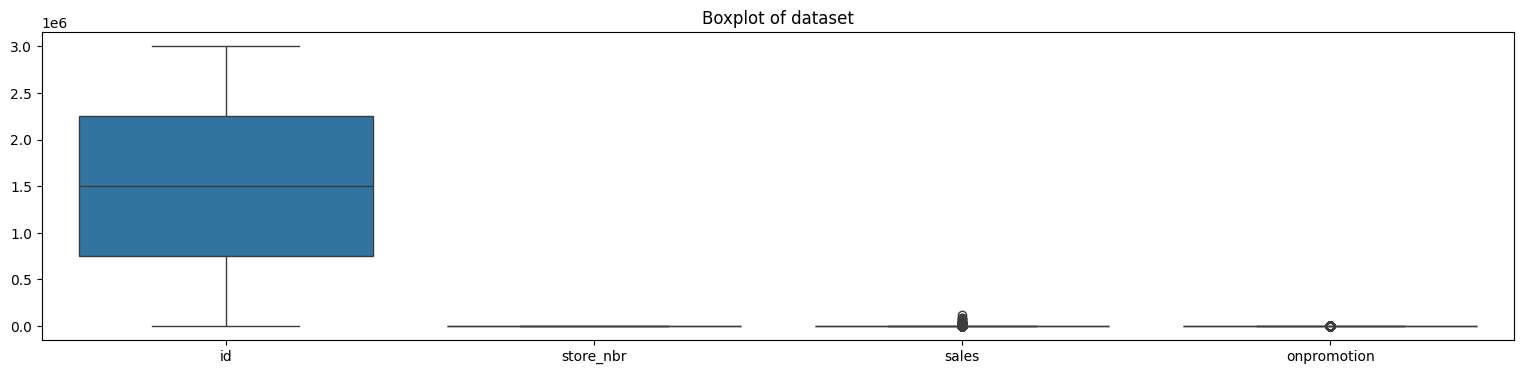

In [26]:
##checking the data distribution to see if there are outliers
plt.figure(figsize=(19, 4))
sns.boxplot(df_train)
plt.title("Boxplot of dataset")

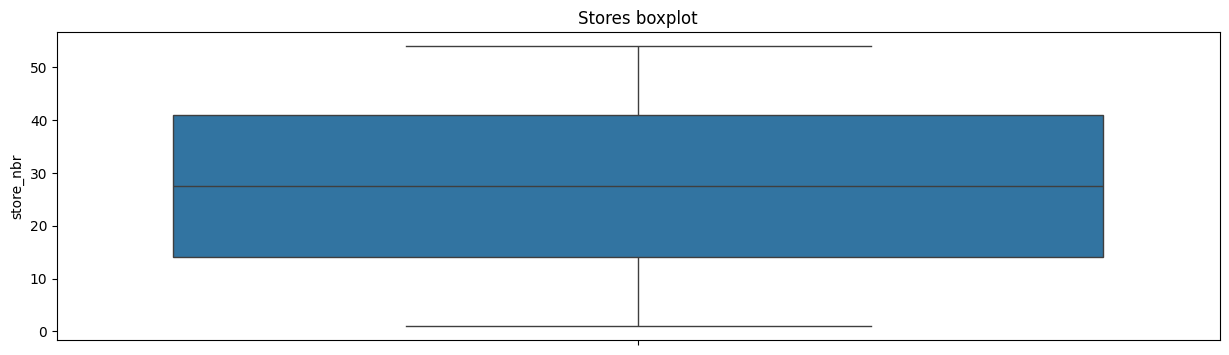

In [27]:
##checking for outliers in the stores column
plt.figure(figsize=(15, 4))
sns.boxplot(df_train["store_nbr"])
plt.title("Stores boxplot")
plt.show()

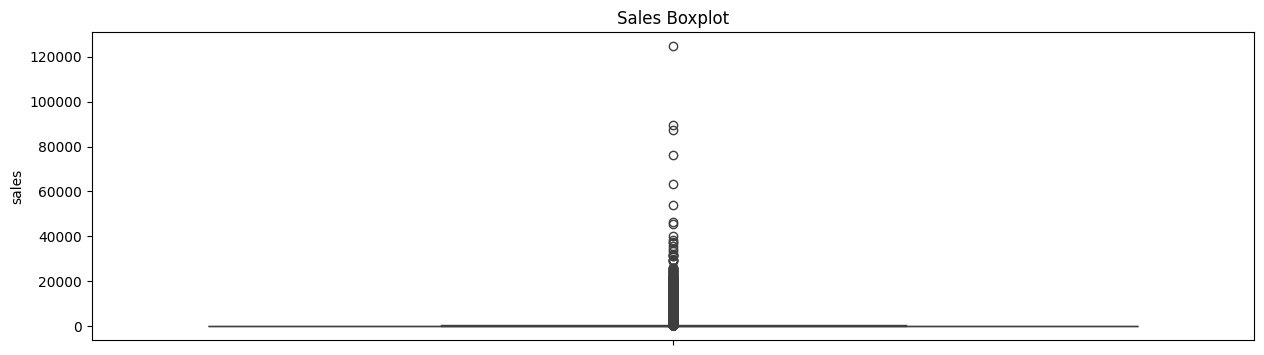

In [28]:
##checking for outliers in the slaes column
plt.figure(figsize=(15,4))
sns.boxplot(df_train["sales"])
plt.title("Sales Boxplot")
plt.show()

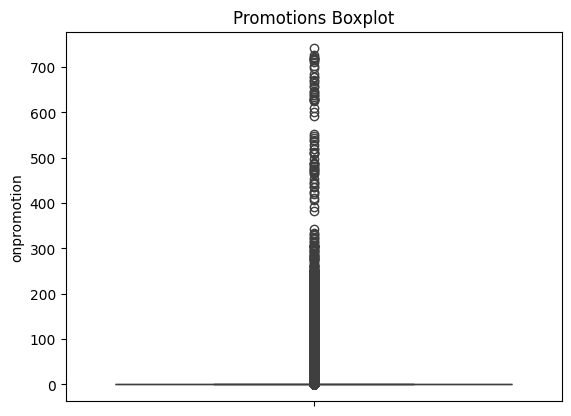

In [29]:
##checking for outliers in the onpromotion column

sns.boxplot(df_train["onpromotion"])
plt.title("Promotions Boxplot")
plt.show()

In [24]:
##setting the date as the index in order to make visualizations
df_train.set_index("date", inplace=True)

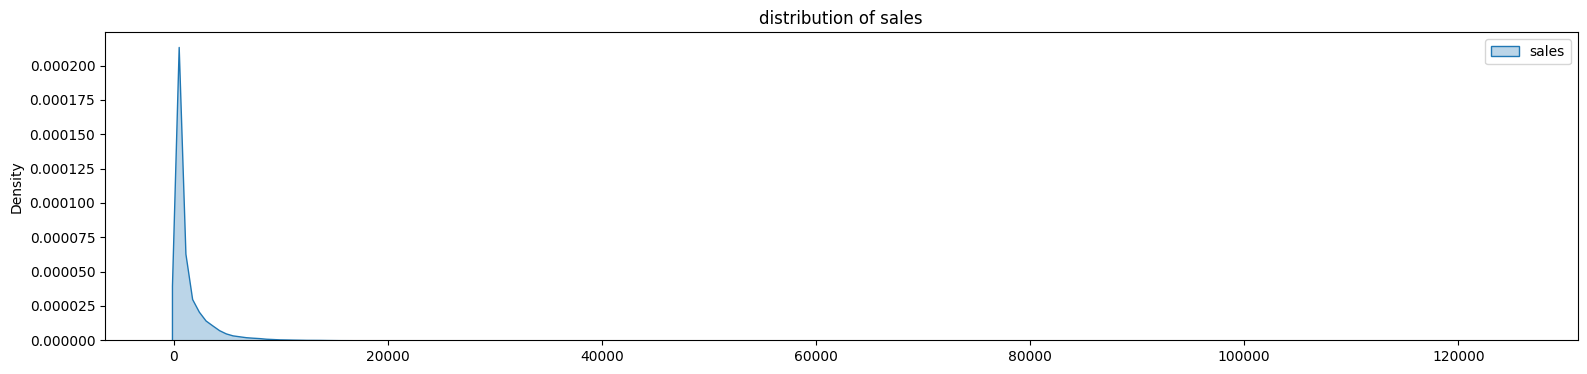

In [31]:
## distribution of the Sales column
plt.figure(figsize=(19, 4))
sns.kdeplot(df_train.drop(["family", "id", "store_nbr", "onpromotion"], axis=1), alpha=0.3, fill=True)
plt.title("distribution of sales")
plt.show()

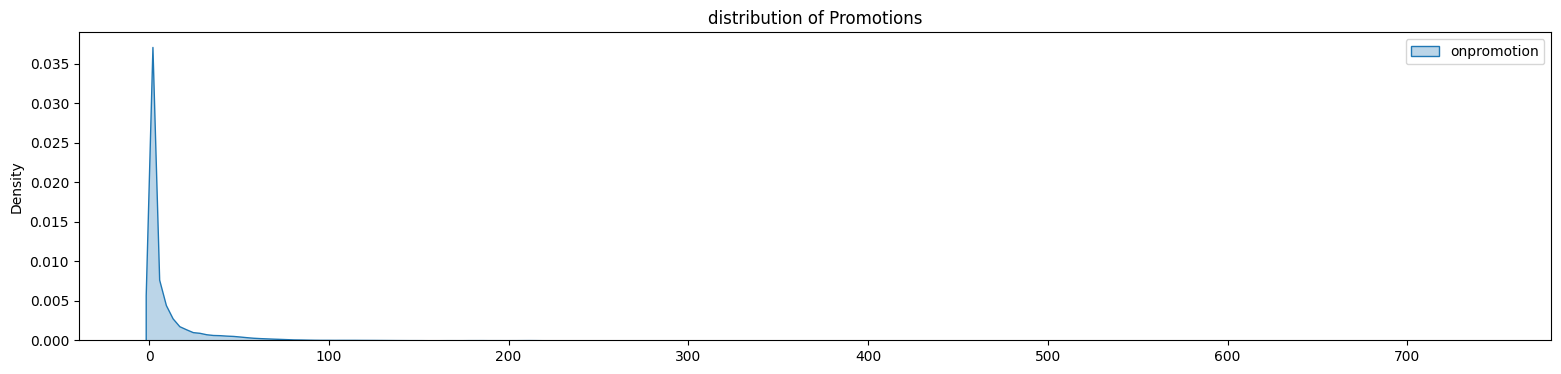

In [32]:
## distribution of the onpromotion column
plt.figure(figsize=(19, 4))
sns.kdeplot(df_train.drop(["family", "id", "store_nbr", "sales"], axis=1), alpha=0.3, fill=True)
plt.title("distribution of Promotions")
plt.show()

In [33]:
## checking for skewness of distribution
df_train[["sales", "onpromotion"]].skew()

sales           7.358758
onpromotion    11.166562
dtype: float64

Observation
- There are outliers in promotion column 
- There are outliers in sales column
- on promotion column is positively skewed
- sales column is postively skewed

Bivariate Analysis

Text(0.5, 1.0, 'sales against family')

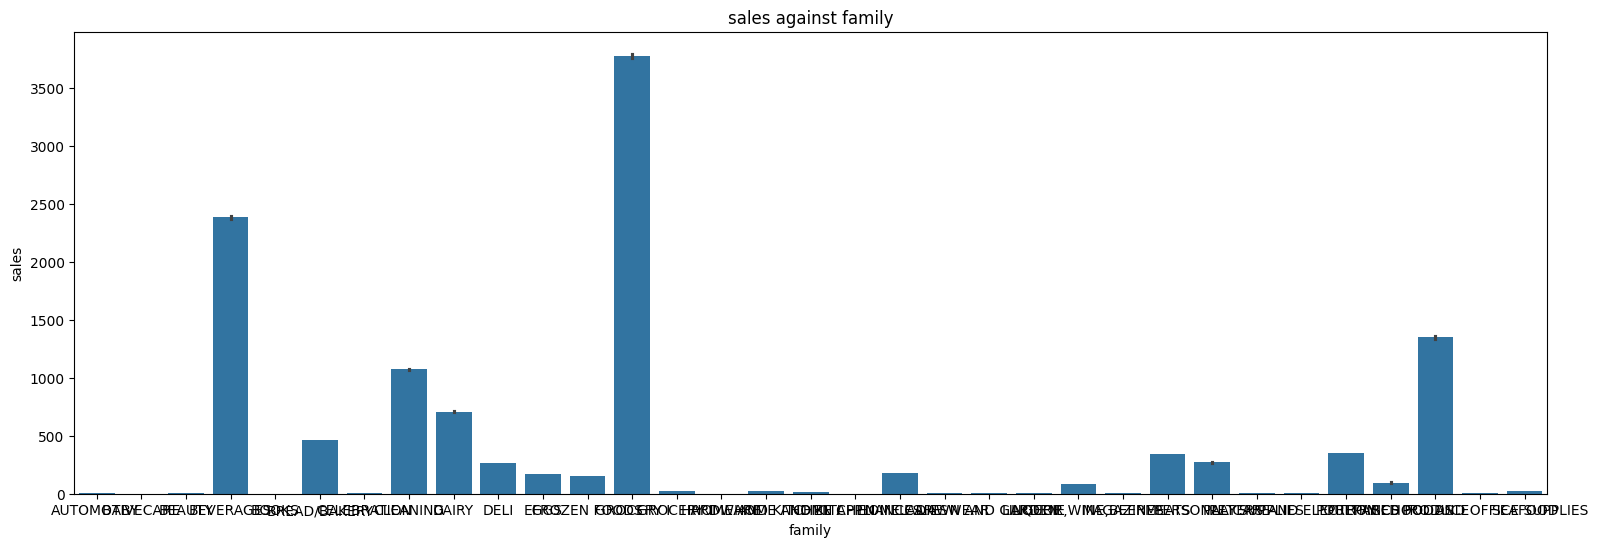

In [34]:
## plotting the distribution of sales against family
plt.figure(figsize=(19, 6))
sns.barplot(data=df_train, x=df_train["family"], y=df_train["sales"])
plt.title("sales against family")

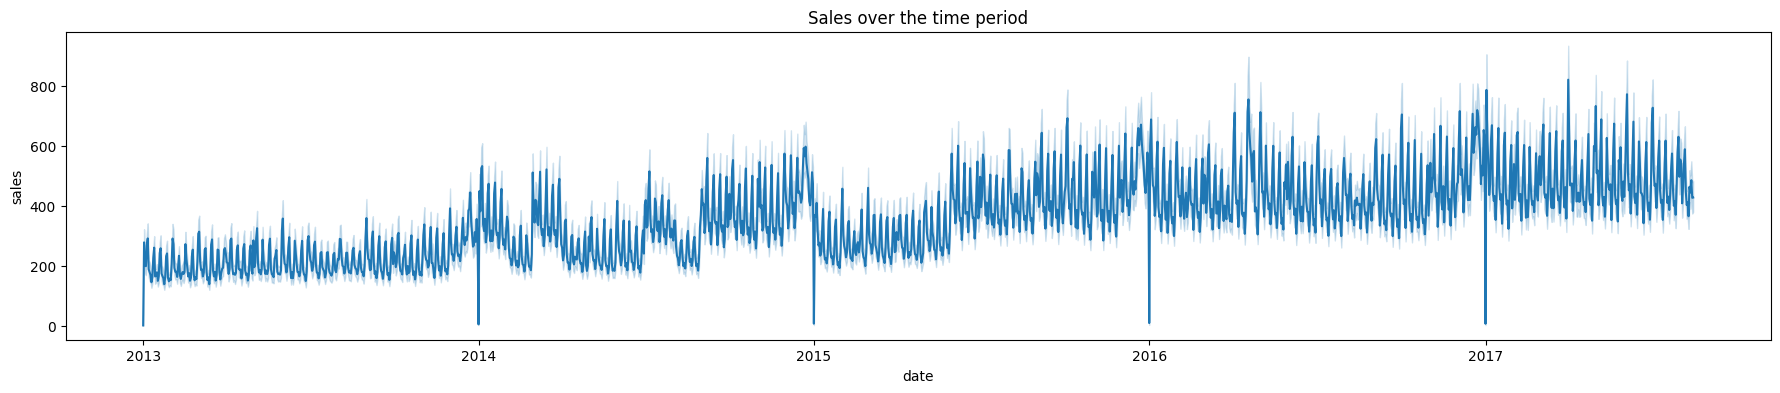

In [35]:
##visualizing the sales over the time period
plt.figure(figsize=(22, 4))
sns.lineplot(x=df_train.index, y=df_train["sales"], data=df_train)
plt.title("Sales over the time period")
plt.show()

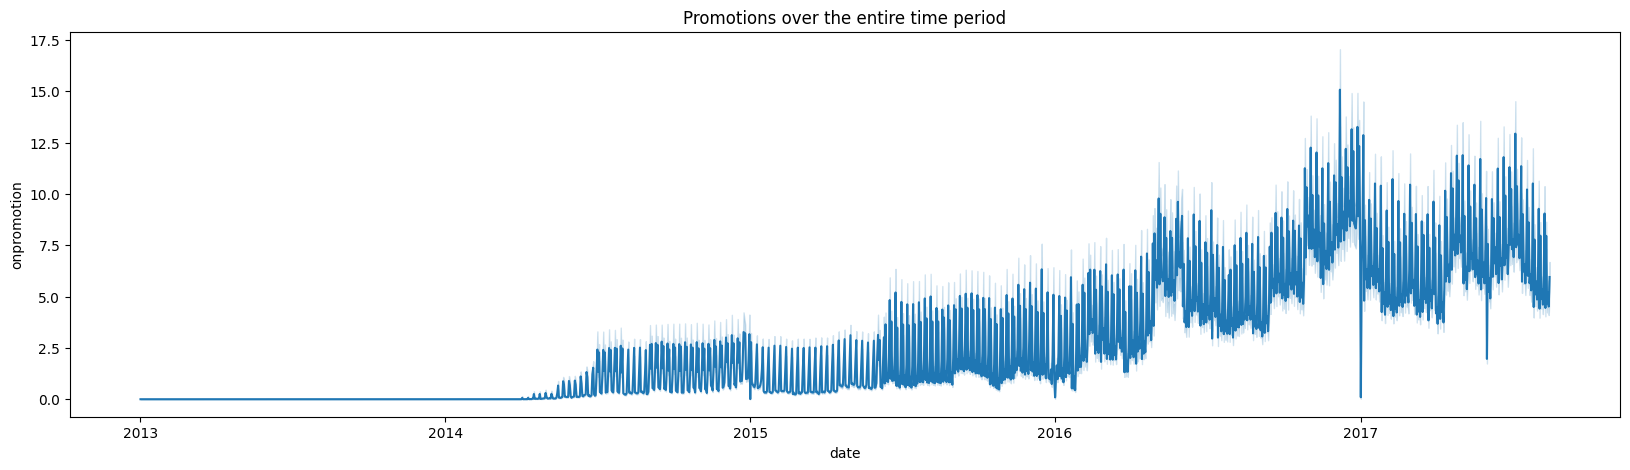

In [36]:
##visualizing the promotions over the time period
plt.figure(figsize=(20, 5))
sns.lineplot(x=df_train.index, y=df_train["onpromotion"], data=df_train)
plt.title("Promotions over the entire time period")
plt.show()

Checking for data completeness

In [25]:
##checking for data completeness
start_day = df_train.index.min()
end_day = df_train.index.max()

print(f'start day is {start_day}')
print(f'end day is {end_day}')

start day is 2013-01-01 00:00:00
end day is 2017-08-15 00:00:00


In [26]:
## creating date range 
date_range = pd.date_range(start=start_day, end=end_day, freq="D")
date_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [27]:
## obtaining the missing date entries
existing_date = df_train.index
missing_date = date_range.difference(existing_date)
missing_date

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

Observation
- 25th of December 2013,2014, 2015, 2016 seem to be missing from our data
- Our date range is 1688 but our available dates are 1684
- We can assume the company/Stores did not open

Actions
- To input these dates, we need to make sure it is inputed for all the stores available as well as the families
- Hence we will generate 54stores x 4 missing dates x 33 families = 7,128 datapoints

In [28]:
date_range.size

1688

In [29]:
families = df_train["family"].unique()
print(f'Unique families in the train data is {families.size}')
families

Unique families in the train data is 33


array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [30]:
store_nbr = df_train["store_nbr"].unique()

In [31]:
##Creating new datapoints for missing dates
missing_data_points = product(missing_date, store_nbr,families)

new_data = pd.DataFrame(data=missing_data_points, columns=["date", "store_nbr", "family"])
new_data
                        

date  store_nbr                      family
0    2013-12-25          1                  AUTOMOTIVE
1    2013-12-25          1                   BABY CARE
2    2013-12-25          1                      BEAUTY
3    2013-12-25          1                   BEVERAGES
4    2013-12-25          1                       BOOKS
...         ...        ...                         ...
7123 2016-12-25          9                     POULTRY
7124 2016-12-25          9              PREPARED FOODS
7125 2016-12-25          9                     PRODUCE
7126 2016-12-25          9  SCHOOL AND OFFICE SUPPLIES
7127 2016-12-25          9                     SEAFOOD

[7128 rows x 3 columns]

In [32]:
new_data = new_data.set_index("date")


In [33]:
## Adding our new data to the original data to make it complete
full_train_data = pd.concat([df_train, new_data], axis=0)
#full_train_data.set_index("date", inplace=True)

In [34]:
full_train_data = full_train_data.drop(columns="id")

In [35]:
full_train_data.isna().sum()

store_nbr         0
family            0
sales          7128
onpromotion    7128
dtype: int64

In [36]:
full_train_data.head(15)

store_nbr        family  sales  onpromotion
date                                                   
2013-01-01          1    AUTOMOTIVE    0.0          0.0
2013-01-01          1     BABY CARE    0.0          0.0
2013-01-01          1        BEAUTY    0.0          0.0
2013-01-01          1     BEVERAGES    0.0          0.0
2013-01-01          1         BOOKS    0.0          0.0
2013-01-01          1  BREAD/BAKERY    0.0          0.0
2013-01-01          1   CELEBRATION    0.0          0.0
2013-01-01          1      CLEANING    0.0          0.0
2013-01-01          1         DAIRY    0.0          0.0
2013-01-01          1          DELI    0.0          0.0
2013-01-01          1          EGGS    0.0          0.0
2013-01-01          1  FROZEN FOODS    0.0          0.0
2013-01-01          1     GROCERY I    0.0          0.0
2013-01-01          1    GROCERY II    0.0          0.0
2013-01-01          1      HARDWARE    0.0          0.0

In [37]:
full_train_data.isna().sum()

store_nbr         0
family            0
sales          7128
onpromotion    7128
dtype: int64

In [38]:
full_train_data = full_train_data.fillna(0)

In [39]:
## adding new features
def create_new_features(full_train_data):
    full_train_data['month_name'] = full_train_data.index.month_name()
    full_train_data[ 'month'] = full_train_data.index.month
    full_train_data[ 'year'] = full_train_data.index.year
    full_train_data['day'] = full_train_data.index.dayofweek
    return full_train_data

full_train_data_nf = create_new_features(full_train_data)

In [40]:
##checking new features added
full_train_data_nf.head()

store_nbr      family  sales  onpromotion month_name  month  year  \
date                                                                            
2013-01-01          1  AUTOMOTIVE    0.0          0.0    January      1  2013   
2013-01-01          1   BABY CARE    0.0          0.0    January      1  2013   
2013-01-01          1      BEAUTY    0.0          0.0    January      1  2013   
2013-01-01          1   BEVERAGES    0.0          0.0    January      1  2013   
2013-01-01          1       BOOKS    0.0          0.0    January      1  2013   

            day  
date             
2013-01-01    1  
2013-01-01    1  
2013-01-01    1  
2013-01-01    1  
2013-01-01    1

In [41]:
full_train_data.head()

store_nbr      family  sales  onpromotion month_name  month  year  \
date                                                                            
2013-01-01          1  AUTOMOTIVE    0.0          0.0    January      1  2013   
2013-01-01          1   BABY CARE    0.0          0.0    January      1  2013   
2013-01-01          1      BEAUTY    0.0          0.0    January      1  2013   
2013-01-01          1   BEVERAGES    0.0          0.0    January      1  2013   
2013-01-01          1       BOOKS    0.0          0.0    January      1  2013   

            day  
date             
2013-01-01    1  
2013-01-01    1  
2013-01-01    1  
2013-01-01    1  
2013-01-01    1

In [42]:
correlation_wnf = full_train_data.drop(columns=["family", "month_name"]).corr()

<Axes: >

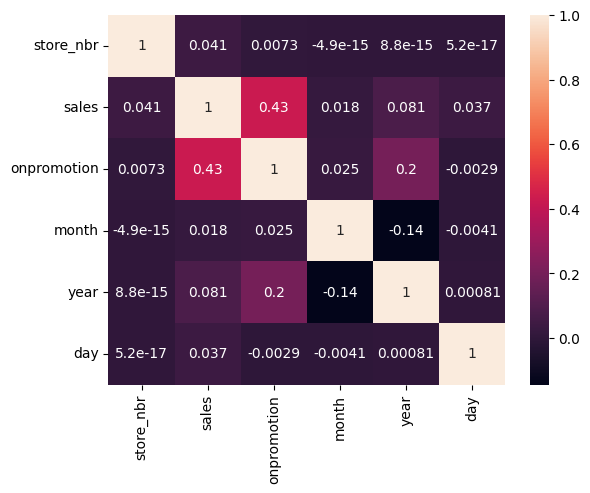

In [43]:
sns.heatmap(correlation_wnf, annot=True)

In [44]:
correlation_wwnf = full_train_data.drop(columns=["family", "month_name", "year", "month"]).corr()

<Axes: >

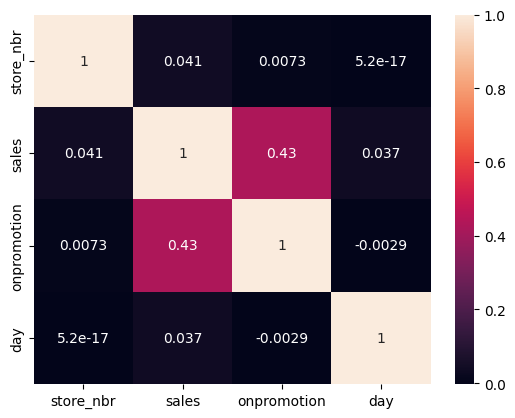

In [45]:
sns.heatmap(correlation_wwnf, annot=True)

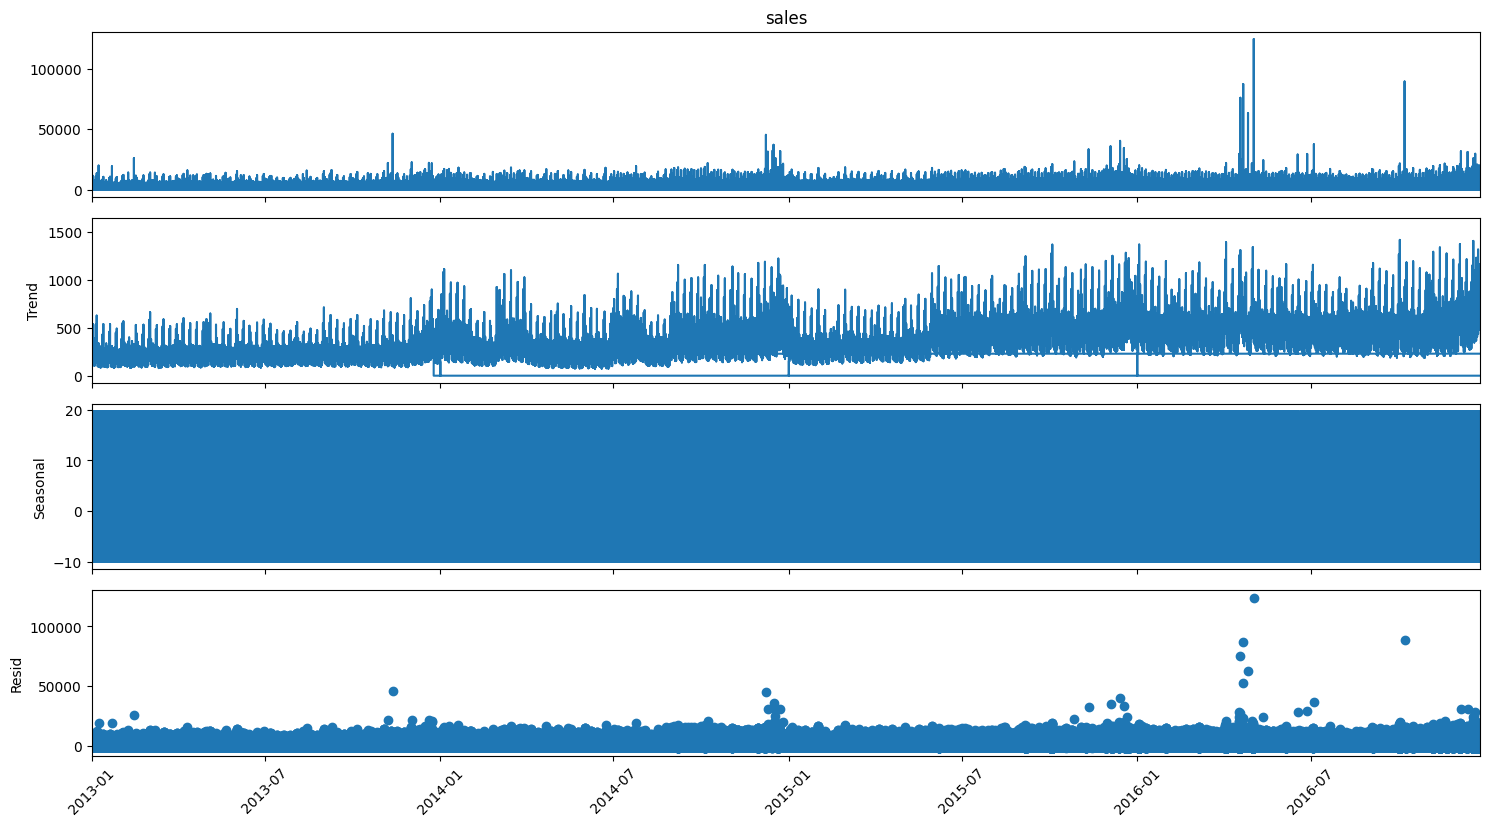

In [47]:
## Decomposition
result = seasonal_decompose(full_train_data["sales"], model="additive", period=365)
plt.rcParams.update({"figure.figsize":(15,8)})
result.plot()
plt.xticks(rotation=45)
plt.show()

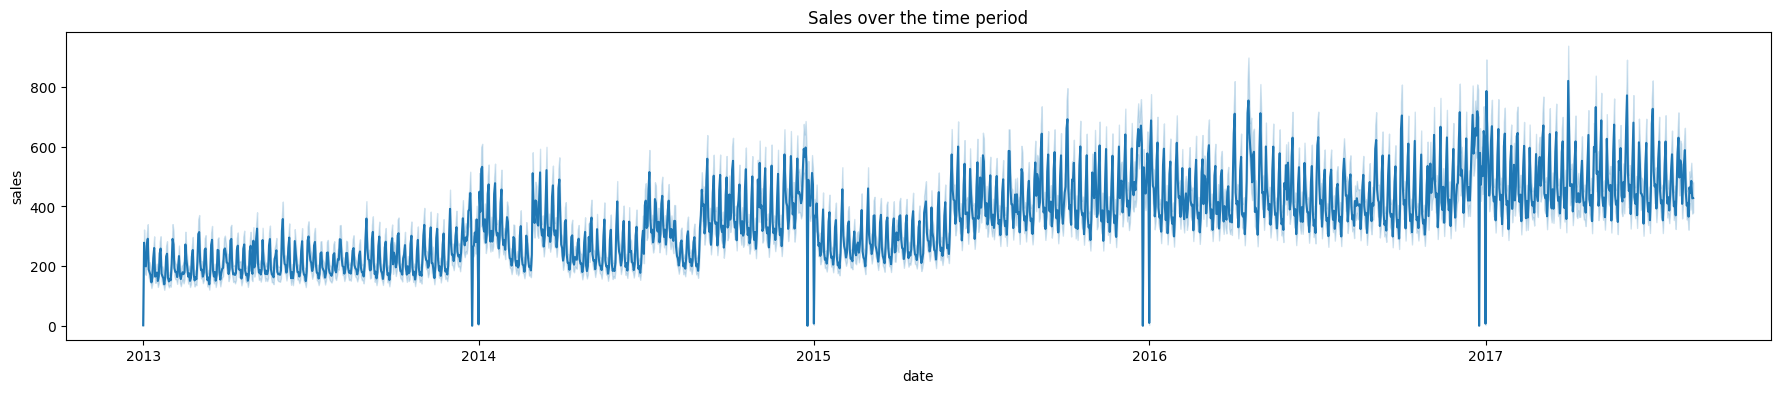

In [59]:
##visualizing the sales over the time period
plt.figure(figsize=(22, 4))
sns.lineplot(x=full_train_data.index, y=full_train_data["sales"], data=full_train_data)
plt.title("Sales over the time period")
plt.show()

Observation
- There is no seasonality in our sales data hence we would need to use models like ARIMA
- In our decomposition, the trend is not really clear but after plotting by years we can see a clear postive trend in sales


In [48]:
decomposition_df = pd.DataFrame({
    "Trend": result.trend,
    "Seasonality": result.seasonal, 
    "Residual": result.resid,
    "Observed": result.observed,
})
decomposition_df

Trend  Seasonality  Residual  Observed
date                                              
2013-01-01    NaN     2.948163       NaN       0.0
2013-01-01    NaN     2.194911       NaN       0.0
2013-01-01    NaN    -0.175388       NaN       0.0
2013-01-01    NaN    15.736269       NaN       0.0
2013-01-01    NaN    -0.456797       NaN       0.0
...           ...          ...       ...       ...
2016-12-25    NaN     0.560507       NaN       0.0
2016-12-25    NaN    -3.567047       NaN       0.0
2016-12-25    NaN    -0.315591       NaN       0.0
2016-12-25    NaN     3.100794       NaN       0.0
2016-12-25    NaN    -2.021224       NaN       0.0

[3008016 rows x 4 columns]

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


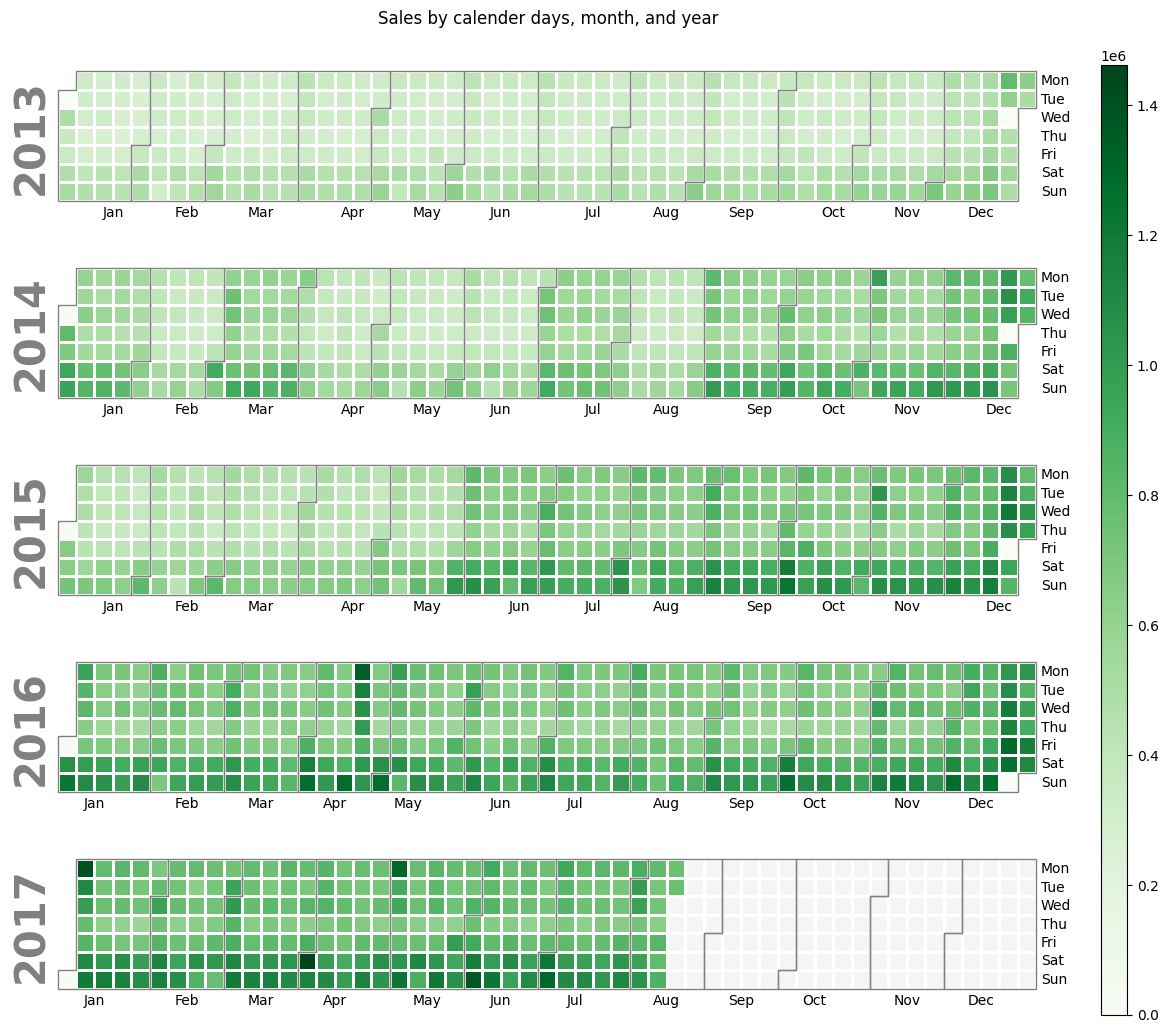

In [61]:
calplot.calplot(full_train_data["sales"], how="sum", cmap="Greens",figsize=(13,10), suptitle="Sales by calender days, month, and year")
plt.show()

Observations
- we can see darker greens on the weekends indicating higher sales
- We can also see darker shades during december indicating higher sales probably because of the festive seasons
- Generally, mondays to thursdays have lower sales 

In [62]:
full_train_data.isna().sum()

store_nbr      0
family         0
sales          0
onpromotion    0
month_name     0
month          0
year           0
day            0
dtype: int64

Checking for stationarity in our dataset

In [52]:
# Downsampling the dataset to monthly frequency to check for stationarity
df_monthly = full_train_data['sales'].resample('M').mean()

# Applying the ADF test to the downsampled dataset
result = adfuller(df_monthly.dropna())

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result [1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ADF Statistic: -1.5144101232609906
p-value: 0.5263711955479565
Data is not stationary


In [53]:
# Downsampling the dataset to weekly frequency to check for stationarity
df_monthly = full_train_data['sales'].resample('W').mean()

# Applying the ADF test to the downsampled dataset
result = adfuller(df_monthly.dropna())

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result [1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ADF Statistic: -1.4817509177560242
p-value: 0.5425188110982653
Data is not stationary


In [80]:
# Downsampling the dataset to daily frequency to check for stationarity
df_monthly = full_train_data['sales'].resample('D').mean()

# Applying the ADF test to the downsampled dataset
result = adfuller(df_monthly.dropna())

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result [1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ADF Statistic: -2.571413630171705
p-value: 0.0990505835248412
Data is not stationary


Visualizing stationarity using rolling statistics

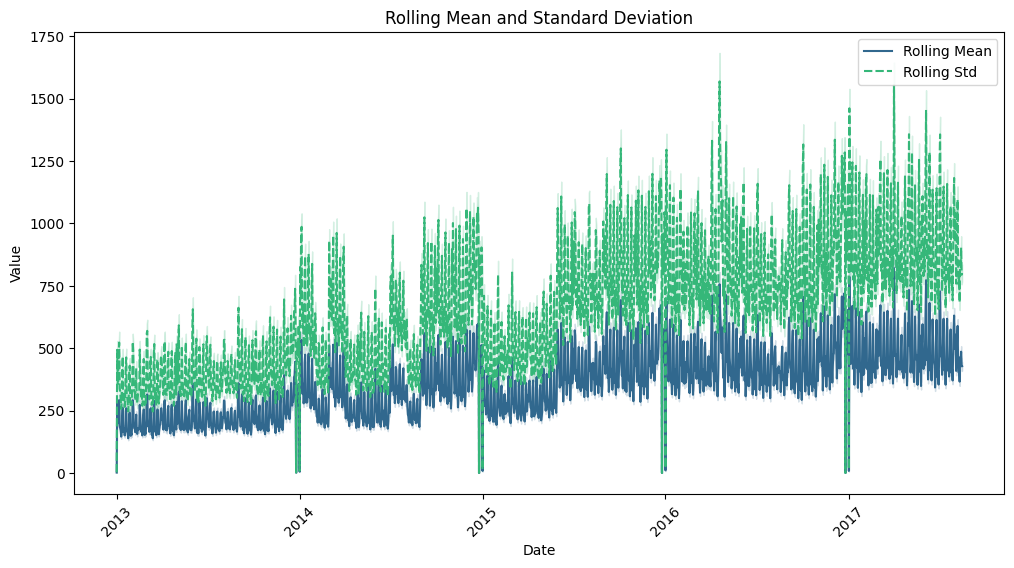

In [82]:
import seaborn as sns

# Assuming df is your DataFrame containing the sales data
rolling_mean = full_train_data["sales"].rolling(window=7).mean()
rolling_std = full_train_data["sales"].rolling(window=7).std()

# Create a new DataFrame for the rolling statistics
rolling_stats = pd.DataFrame({'Rolling Mean': rolling_mean, 'Rolling Std': rolling_std})

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=rolling_stats, palette="viridis")
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


Observation
- The dataset is not stationary(the mean and covariance or Standard Deviation does not remain constant over time)
- we would have to use techniques like moving average to make the dataset more stationary.

Hypothesis Testing

In [57]:
## Hypothesis testing for Sales and onpromotion
# Creating a contigency table
contingency_table = pd.crosstab(full_train_data['sales'], full_train_data['onpromotion'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# printing results of the p-value
print("P-value:", p)

# printing Results of the t-test
# having alpha to be 0.05(level of significance)
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis - which actually implies that there is a significant relationship between Sales and onPromotion.")
else:
    print("Fail to reject the null hypothesis - which implies that there is no significant relationship between Sales and onPromotion.")



P-value: 0.0
Reject the null hypothesis - which actually implies that there is a significant relationship between Sales and onPromotion.


In [50]:
full_train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3008016 entries, 2013-01-01 to 2016-12-25
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   store_nbr    int64  
 1   family       object 
 2   sales        float64
 3   onpromotion  float64
 4   month_name   object 
 5   month        int32  
 6   year         int32  
 7   day          int32  
dtypes: float64(2), int32(3), int64(1), object(2)
memory usage: 172.1+ MB


Analytical questions

1. Is the train dataset complete?
There are missing dates in the train dataset, specifically 25th December of every month. These missing dates were handled early on in the notebook

2. Which dates have the lowest and highest sales for each year excluding days the stores were closed?

In [60]:
maxes = full_train_data.groupby("year")["sales"].max()

In [62]:

# Group by year and find the indexes of the maximum sales for each year
max_indexes = full_train_data.groupby(full_train_data.index.year)["sales"].idxmax()

# Print the dates with the highest sales for each year
for year, date_index in max_indexes.items():
    print(f"Highest sales in {year}: {date_index.date()}")


Highest sales in 2013: 2013-11-12
Highest sales in 2014: 2014-12-08
Highest sales in 2015: 2015-12-14
Highest sales in 2016: 2016-05-02
Highest sales in 2017: 2017-04-02


In [70]:
# Group by year and day, and sum the sales for each day
daily_sales_sum = full_train_data.groupby([full_train_data.index.year, full_train_data.index.date])["sales"].sum()

# Find the date with the highest sales for each year
max_sales_dates = daily_sales_sum.groupby(level=0).idxmax()

# Get the value of the highest sales for each year
max_sales_values = daily_sales_sum.loc[max_sales_dates]

# Print the dates with the highest sales and their corresponding values for each year
for year, (date_index, sales_value) in zip(max_sales_dates.index, zip(max_sales_dates, max_sales_values)):
    print(f"Highest sales in {year}: Date: {date_index}, Sales: {sales_value}")


Highest sales in 2013: Date: (2013, datetime.date(2013, 12, 23)), Sales: 792865.284427
Highest sales in 2014: Date: (2014, datetime.date(2014, 12, 23)), Sales: 1064977.9730725
Highest sales in 2015: Date: (2015, datetime.date(2015, 10, 4)), Sales: 1234130.938595
Highest sales in 2016: Date: (2016, datetime.date(2016, 4, 18)), Sales: 1345920.6048929
Highest sales in 2017: Date: (2017, datetime.date(2017, 4, 1)), Sales: 1463083.962459


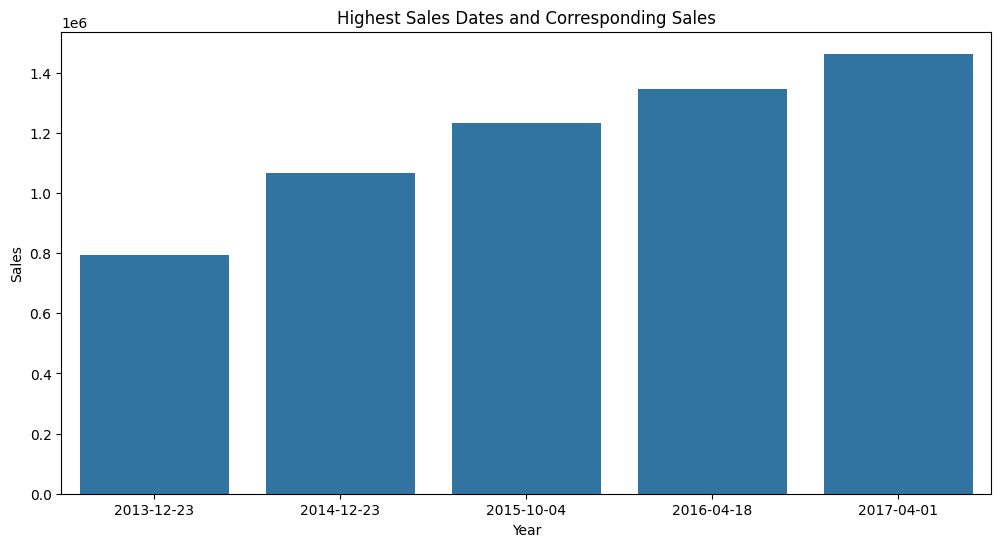

In [75]:
# Creating a data frame for our plot of highest sales date per year
data = {
    "Year": [2013, 2014, 2015, 2016, 2017],
    "Date": [pd.Timestamp('2013-12-23'), pd.Timestamp('2014-12-23'), pd.Timestamp('2015-10-04'),
             pd.Timestamp('2016-04-18'), pd.Timestamp('2017-04-01')],
    "Sales": [792865.284427, 1064977.9730725, 1234130.938595, 1345920.6048929, 1463083.962459]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="Date", y="Sales", data=df)
plt.title("Highest Sales Dates and Corresponding Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()


In [79]:
full_train_data.groupby("day")["sales"].sum()

day
0    1.488278e+08
1    1.379221e+08
2    1.423787e+08
3    1.212646e+08
4    1.390978e+08
5    1.861015e+08
6    1.980523e+08
Name: sales, dtype: float64

In [83]:
# Group by year and find the indexes of the lowest sales for each year
min_indexes = full_train_data.groupby(full_train_data.index.year)["sales"].idxmin()

# Print the dates with the lowest sales for each year
for year, date_index in min_indexes.items():
    print(f"Lowest sales in {year}: {date_index.date()}")


Lowest sales in 2013: 2013-01-01
Lowest sales in 2014: 2014-01-01
Lowest sales in 2015: 2015-01-01
Lowest sales in 2016: 2016-01-01
Lowest sales in 2017: 2017-01-01


In [88]:
# Filter out dates where sales are 0
non_zero_sales_data = full_train_data[full_train_data["sales"] > 0]

# Group by year and day, and sum the sales for each day
daily_sales_sum_min = non_zero_sales_data.groupby([non_zero_sales_data.index.year, non_zero_sales_data.index.date])["sales"].sum()

# Find the date with the lowest sales for each year (level=0 indicates we group by the first level ie year)
min_sales_dates = daily_sales_sum_min.groupby(level=0).idxmin()

# Print the dates with the lowest sales for each year
for year, date_index in min_sales_dates.items():
    print(f"Lowest sales in {year}: {date_index}")


Lowest sales in 2013: (2013, datetime.date(2013, 1, 1))
Lowest sales in 2014: (2014, datetime.date(2014, 1, 1))
Lowest sales in 2015: (2015, datetime.date(2015, 1, 1))
Lowest sales in 2016: (2016, datetime.date(2016, 1, 1))
Lowest sales in 2017: (2017, datetime.date(2017, 1, 1))


In [92]:
# Filter out the dates where sales are 0 (holidays)
filtered_data = full_train_data[full_train_data["sales"] > 0]

# Group by year and day, and sum the sales for each day
daily_sales_sum = filtered_data.groupby([filtered_data.index.year, filtered_data.index.date])["sales"].sum()

# Find the date with the lowest sales for each year
min_sales_dates = daily_sales_sum.groupby(level=0).idxmin()

# Get the value of the lowest sales for each year
min_sales_values = daily_sales_sum.loc[min_sales_dates]

# Print the dates with the lowest sales and their corresponding values for each year
for year, (date_index, sales_value) in zip(min_sales_dates.index, zip(min_sales_dates, min_sales_values)):
    print(f"Lowest sales in {year}: Date: {date_index[1]}, Sales: {sales_value}")


Lowest sales in 2013: Date: 2013-01-01, Sales: 2511.618999
Lowest sales in 2014: Date: 2014-01-01, Sales: 8602.065404
Lowest sales in 2015: Date: 2015-01-01, Sales: 12773.61698
Lowest sales in 2016: Date: 2016-01-01, Sales: 16433.394
Lowest sales in 2017: Date: 2017-01-01, Sales: 12082.500997


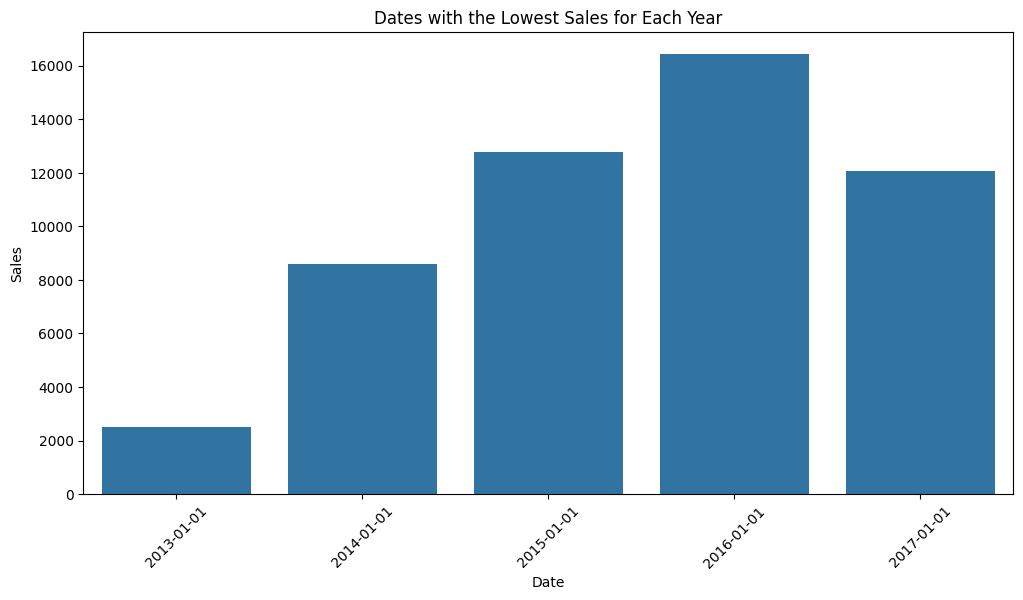

In [96]:
# Convert min_sales_dates and min_sales_values to a DataFrame
min_sales_df = pd.DataFrame({"Date": [date[1] for date in min_sales_dates.values], "Sales": min_sales_values.values})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="Date", y="Sales", data=min_sales_df)
plt.title("Dates with the Lowest Sales for Each Year")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


3. Compare the sales for each month across the years and determine which  month of which year had the highest sales

In [123]:
# Filter out the dates where sales are 0 (holidays)
filtered_data = full_train_data[full_train_data["sales"] > 0]

# Group by year and day, and sum the sales for each month
monthly_sales_sum = filtered_data.groupby([filtered_data.index.year, filtered_data.index.month])["sales"].sum()

# Find the date with the highest sales for each year
max_sales_month = monthly_sales_sum.groupby(level=0).idxmax()

# Get the value of the highest sales for each month
max_sales_values = monthly_sales_sum.loc[max_sales_month]

# Print the dates with the highest sales and their corresponding values for each month
for year, (date_index, sales_value) in zip(max_sales_month.index, zip(max_sales_month, max_sales_values)):
    print(f"Highest for each month in {year}: Date: {date_index[1]}, Sales: {sales_value}")


Highest for each month in 2013: Date: 12, Sales: 15803117.1479746
Highest for each month in 2014: Date: 12, Sales: 24340454.3638302
Highest for each month in 2015: Date: 12, Sales: 27243981.6737737
Highest for each month in 2016: Date: 12, Sales: 29640287.5793851
Highest for each month in 2017: Date: 7, Sales: 27011477.5658307


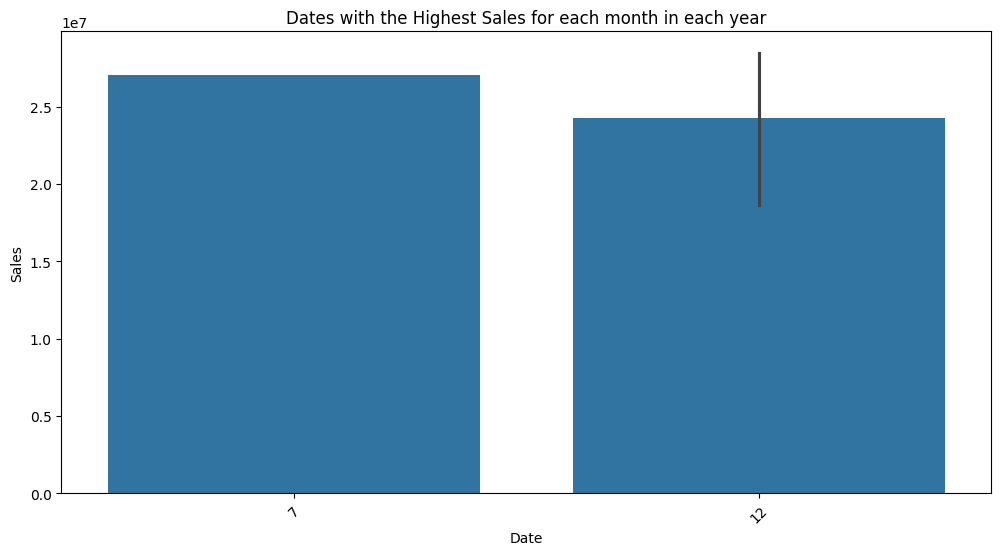

In [125]:
# Convert min_sales_dates and min_sales_values to a DataFrame
max_sales_df = pd.DataFrame({"Date": [date[1] for date in max_sales_month.values], "Sales": max_sales_values.values})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="Date", y="Sales", data=max_sales_df)
plt.title("Dates with the Highest Sales for each month in each year")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In [126]:
max_sales_df 

Date         Sales
0    12  1.580312e+07
1    12  2.434045e+07
2    12  2.724398e+07
3    12  2.964029e+07
4     7  2.701148e+07

In [139]:
max_sales_df["year"] = [2013, 2014, 2015, 2016, 2017]
max_sales_df


Date         Sales  year
0    12  1.580312e+07  2013
1    12  2.434045e+07  2014
2    12  2.724398e+07  2015
3    12  2.964029e+07  2016
4     7  2.701148e+07  2017

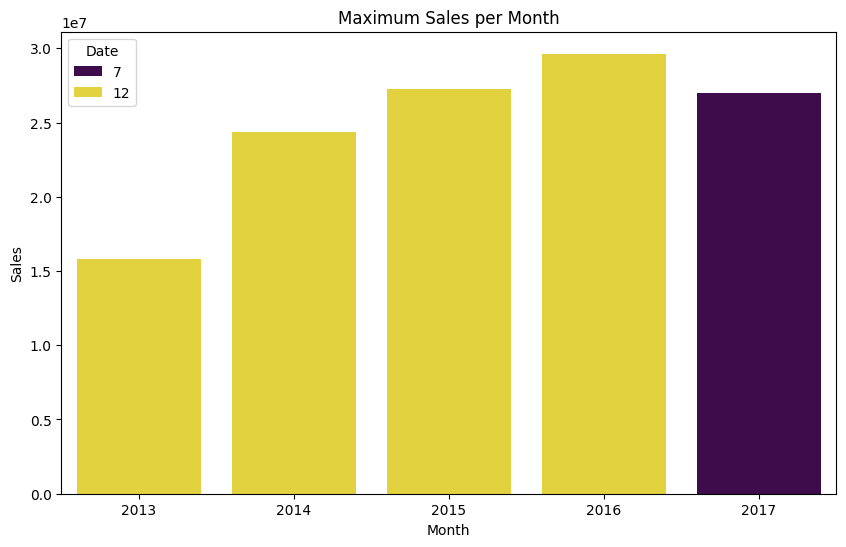

In [144]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="year", y='Sales', data=max_sales_df, palette='viridis', hue="Date")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Maximum Sales per Month')
plt.show()

4. Did the earthquake impact sales?

In [ ]:
earthquate_date = "2016-04-16"
full_train

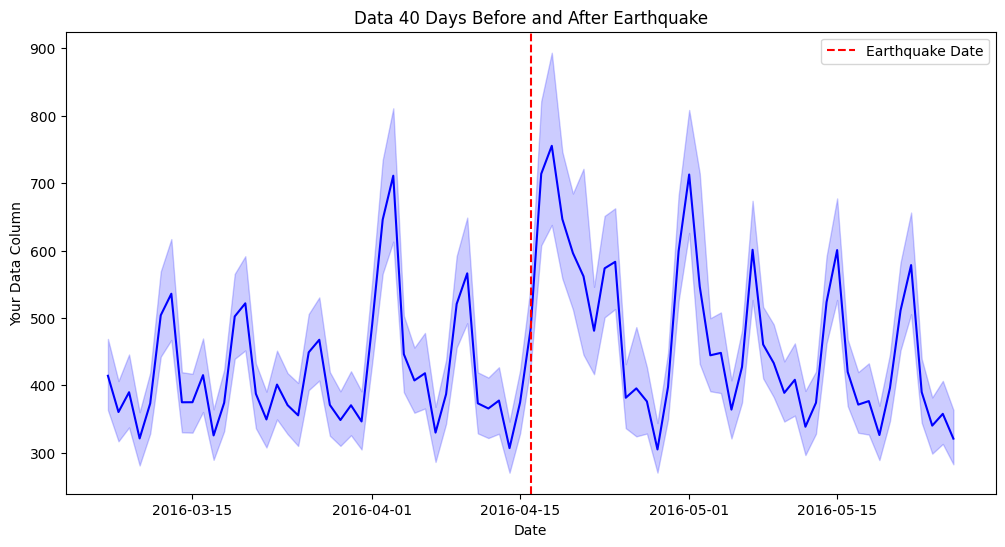

In [146]:
# Assuming earthquake_date is a datetime object
earthquake_date = pd.Timestamp('2016-04-16')

# Filter data for 40 days before and after the earthquake date
start_date = earthquake_date - pd.DateOffset(days=40)
end_date = earthquake_date + pd.DateOffset(days=40)
filtered_data = full_train_data[(full_train_data.index >= start_date) & (full_train_data.index <= end_date)]

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=filtered_data.index, y=filtered_data['sales'], color='b')
plt.axvline(x=earthquake_date, linestyle='--', color='r', label='Earthquake Date')
plt.xlabel('Date')
plt.ylabel('Your Data Column')
plt.title('Data 40 Days Before and After Earthquake')
plt.legend()
plt.show()


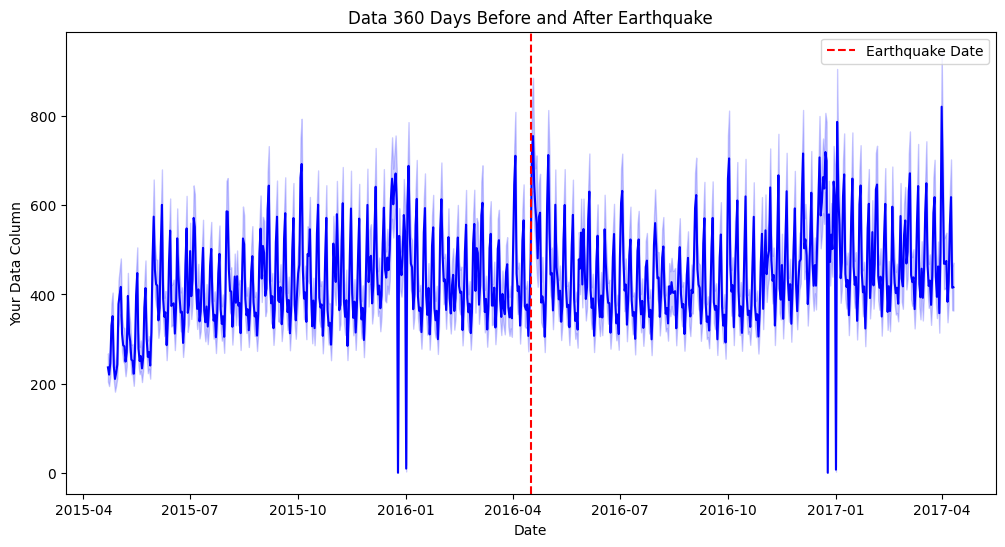

In [152]:
# Assuming earthquake_date is a datetime object
earthquake_date = pd.Timestamp('2016-04-16')

# Filter data for 40 days before and after the earthquake date
start_date = earthquake_date - pd.DateOffset(days=360)
end_date = earthquake_date + pd.DateOffset(days=360)
filtered_data = full_train_data[(full_train_data.index >= start_date) & (full_train_data.index <= end_date)]

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=filtered_data.index, y=filtered_data['sales'], color='b')
plt.axvline(x=earthquake_date, linestyle='--', color='r', label='Earthquake Date')
plt.xlabel('Date')
plt.ylabel('Your Data Column')
plt.title('Data 360 Days Before and After Earthquake')
plt.legend()
plt.show()

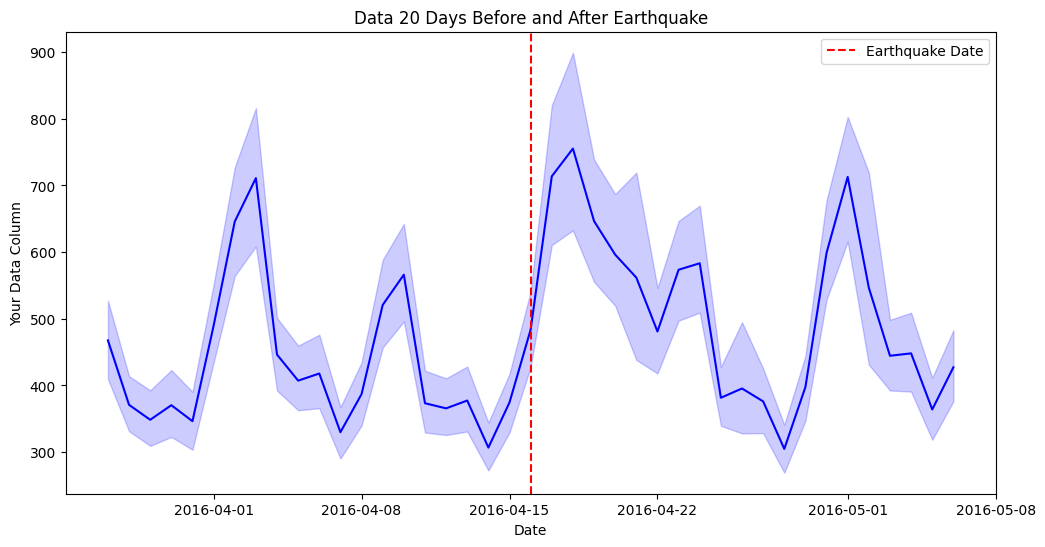

In [149]:
# Assuming earthquake_date is a datetime object
earthquake_date = pd.Timestamp('2016-04-16')

# Filter data for 20 days before and after the earthquake date
start_date = earthquake_date - pd.DateOffset(days=20)
end_date = earthquake_date + pd.DateOffset(days=20)
filtered_data = full_train_data[(full_train_data.index >= start_date) & (full_train_data.index <= end_date)]

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=filtered_data.index, y=filtered_data['sales'], color='b')
plt.axvline(x=earthquake_date, linestyle='--', color='r', label='Earthquake Date')
plt.xlabel('Date')
plt.ylabel('Your Data Column')
plt.title('Data 20 Days Before and After Earthquake')
plt.legend()
plt.show()

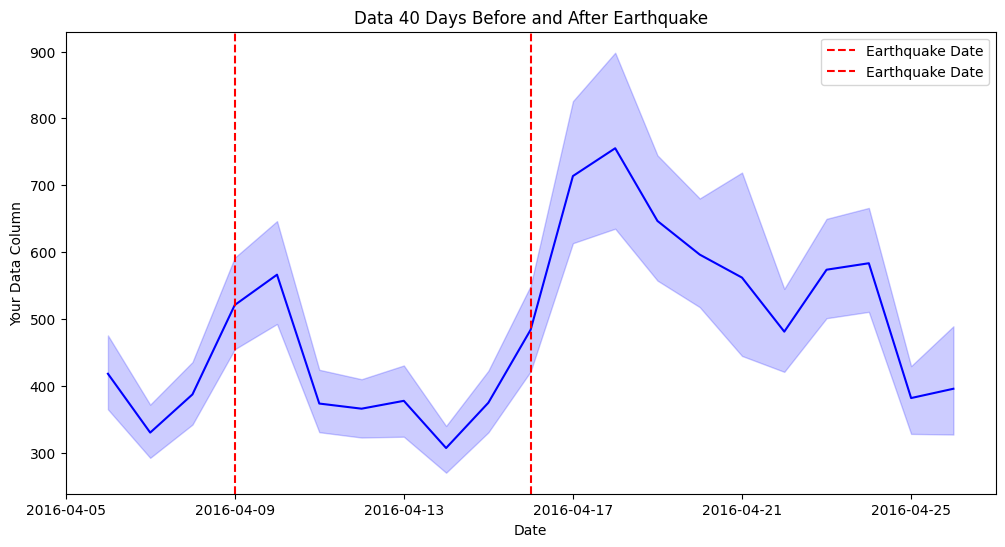

In [151]:

# Assuming earthquake_date is a datetime object
earthquake_date = pd.Timestamp('2016-04-16')

one_week_ago_earthquake_date = pd.Timestamp('2016-04-09')

# Filter data for 40 days before and after the earthquake date
start_date = earthquake_date - pd.DateOffset(days=10)
end_date = earthquake_date + pd.DateOffset(days=10)
filtered_data = full_train_data[(full_train_data.index >= start_date) & (full_train_data.index <= end_date)]

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=filtered_data.index, y=filtered_data['sales'], color='b')
plt.axvline(x=earthquake_date, linestyle='--', color='r', label='Earthquake Date')
plt.axvline(x=one_week_ago_earthquake_date, linestyle='--', color='r', label='Earthquake Date')
plt.xlabel('Date')
plt.ylabel('Your Data Column')
plt.title('Data 40 Days Before and After Earthquake')
plt.legend()
plt.show()


Observation
- We can see that after the earthquake, it seems as though sales increases
- But we need to note that sales usually dips around midweek and begin to rise from thursday up to the weekend which is sunday.
- If you take a look at the past week on the same day of the earthquake, we can see that sales increased towards the end of the week after the earthquake as compared to the previous week.
- Sales were even still quite high around the midweeks as compared to the previous week which is unusual.
- Also when you check 360 days before and after the earthquake, we can see there is a little push in sales in terms of trend

5. Are certain stores or groups selling more products? (cluster, city, state, type)

In [153]:
full_train_data.head()

store_nbr      family  sales  onpromotion month_name  month  year  \
date                                                                            
2013-01-01          1  AUTOMOTIVE    0.0          0.0    January      1  2013   
2013-01-01          1   BABY CARE    0.0          0.0    January      1  2013   
2013-01-01          1      BEAUTY    0.0          0.0    January      1  2013   
2013-01-01          1   BEVERAGES    0.0          0.0    January      1  2013   
2013-01-01          1       BOOKS    0.0          0.0    January      1  2013   

            day  
date             
2013-01-01    1  
2013-01-01    1  
2013-01-01    1  
2013-01-01    1  
2013-01-01    1

In [156]:
df_stores.head()

Unnamed: 0  store_nbr           city                           state type  \
0           0          1          Quito                       Pichincha    D   
1           1          2          Quito                       Pichincha    D   
2           2          3          Quito                       Pichincha    D   
3           3          4          Quito                       Pichincha    D   
4           4          5  Santo Domingo  Santo Domingo de los Tsachilas    D   

   cluster  
0       13  
1       13  
2        8  
3        9  
4        4

In [209]:
merge1 = pd.merge(full_train_data, df_stores, on="store_nbr", how="inner")

In [210]:
merge1.head()

store_nbr      family  sales  onpromotion month_name  month  year  day  \
0          1  AUTOMOTIVE    0.0          0.0    January      1  2013    1   
1          1   BABY CARE    0.0          0.0    January      1  2013    1   
2          1      BEAUTY    0.0          0.0    January      1  2013    1   
3          1   BEVERAGES    0.0          0.0    January      1  2013    1   
4          1       BOOKS    0.0          0.0    January      1  2013    1   

   Unnamed: 0   city      state type  cluster  
0           0  Quito  Pichincha    D       13  
1           0  Quito  Pichincha    D       13  
2           0  Quito  Pichincha    D       13  
3           0  Quito  Pichincha    D       13  
4           0  Quito  Pichincha    D       13

Text(0.5, 1.0, 'Sales by Stores')

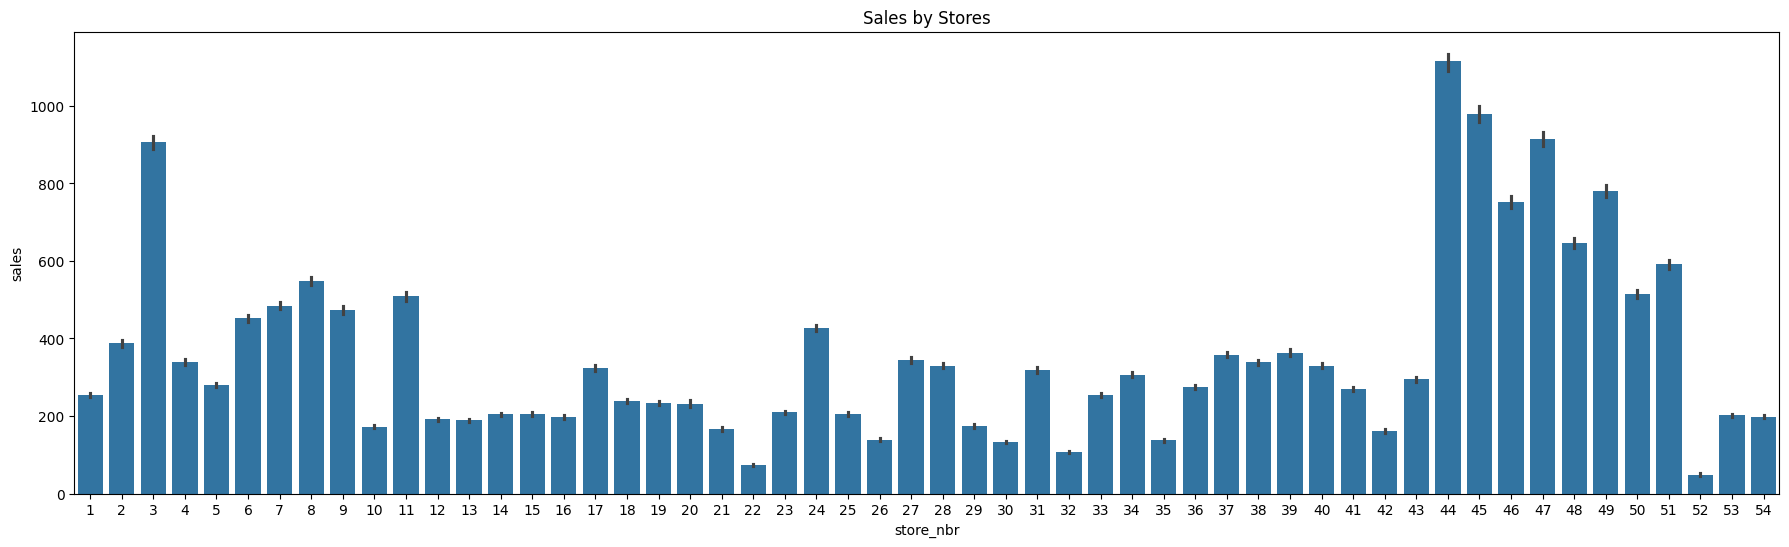

In [163]:
plt.figure(figsize=(22,6))
sns.barplot(x="store_nbr", y="sales", data=merge1)
plt.title("Sales by Stores")

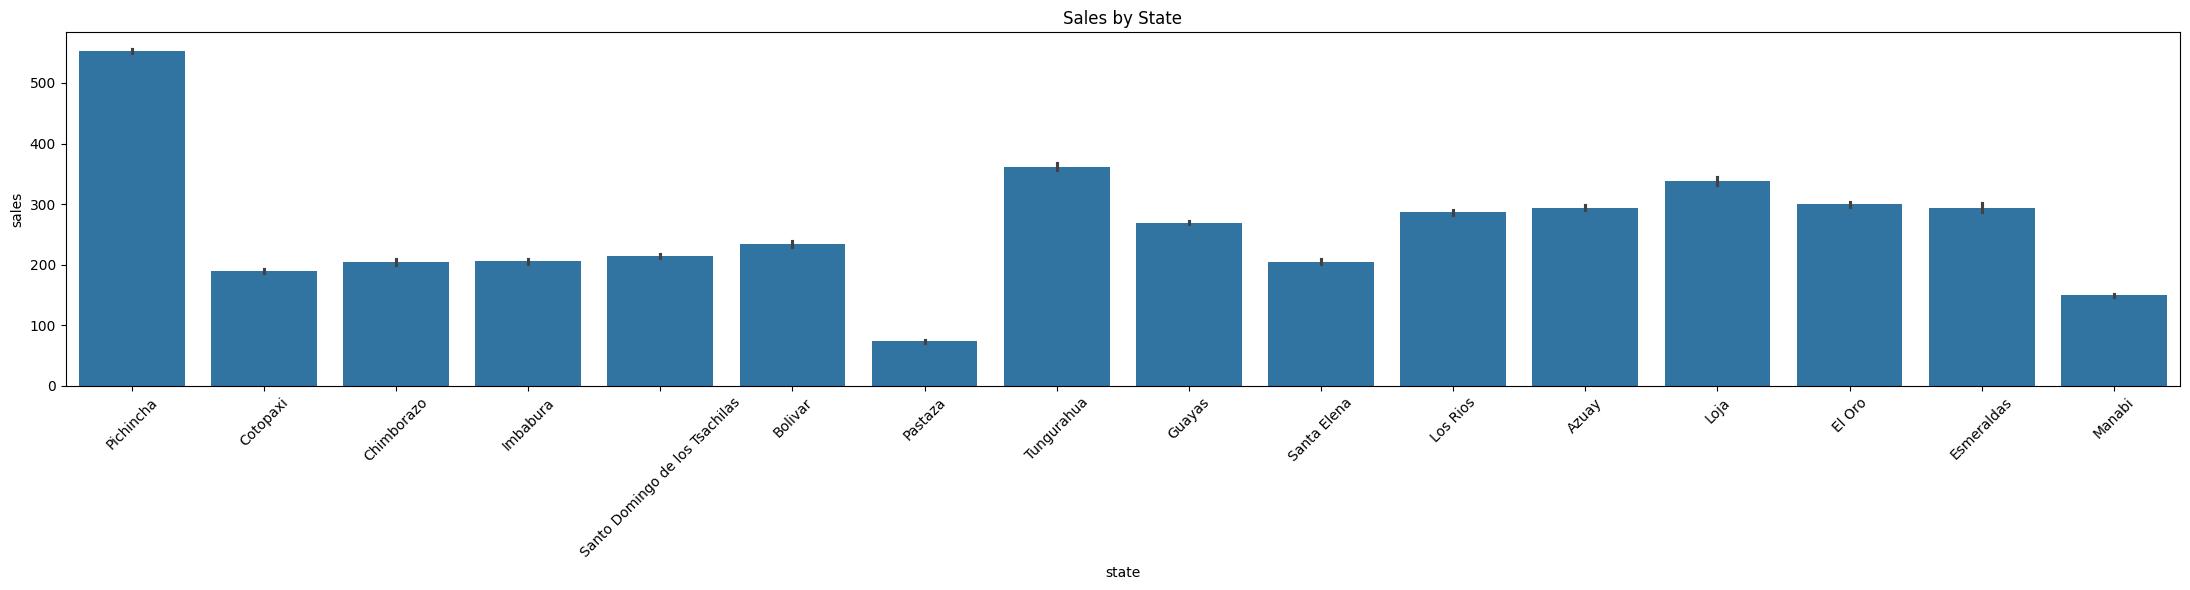

In [167]:
plt.figure(figsize=(22,6))
sns.barplot(x="state", y="sales", data=merge1)
plt.title("Sales by State")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Text(0.5, 1.0, 'Sales by type')

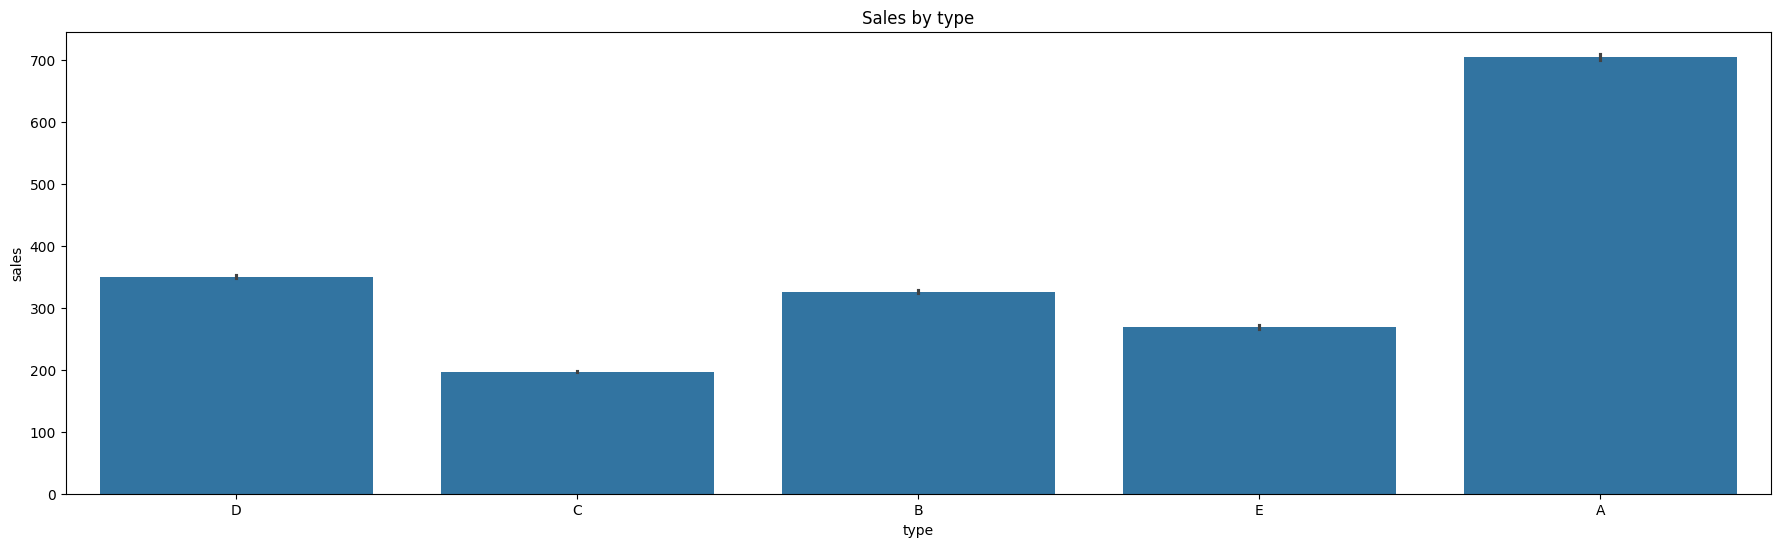

In [165]:
plt.figure(figsize=(22,6))
sns.barplot(x="type", y="sales", data=merge1)
plt.title("Sales by type")

In [217]:
clust = merge1.groupby("cluster")["sales"].sum().reset_index().sort_values(by="sales", ascending=True)
clust

cluster         sales
15       16  1.325938e+07
6         7  1.547812e+07
11       12  1.803097e+07
1         2  2.891640e+07
8         9  3.056108e+07
16       17  3.291149e+07
3         4  4.944344e+07
0         1  5.437675e+07
14       15  5.529695e+07
4         5  6.208755e+07
12       13  7.210225e+07
2         3  7.562870e+07
9        10  8.532443e+07
10       11  1.006143e+08
7         8  1.079282e+08
5         6  1.142544e+08
13       14  1.574305e+08

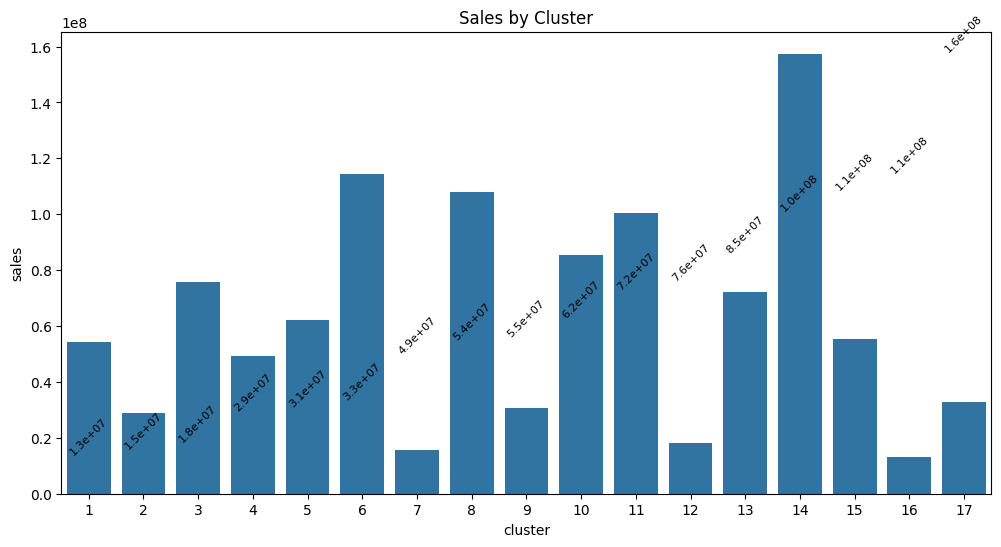

In [228]:

plt.figure(figsize=(12, 6))  # Adjust the figsize as needed

sns.barplot(x="cluster", y="sales", data=clust)
plt.title("Sales by Cluster")

# Adding labels to the bars
for index, value in enumerate(clust["sales"]):
    plt.text(index, value + 100, f"{value:.1e}", ha='center', va='bottom', rotation=45, fontsize=8)



plt.show()

Text(0.5, 1.0, 'Sales by cluster')

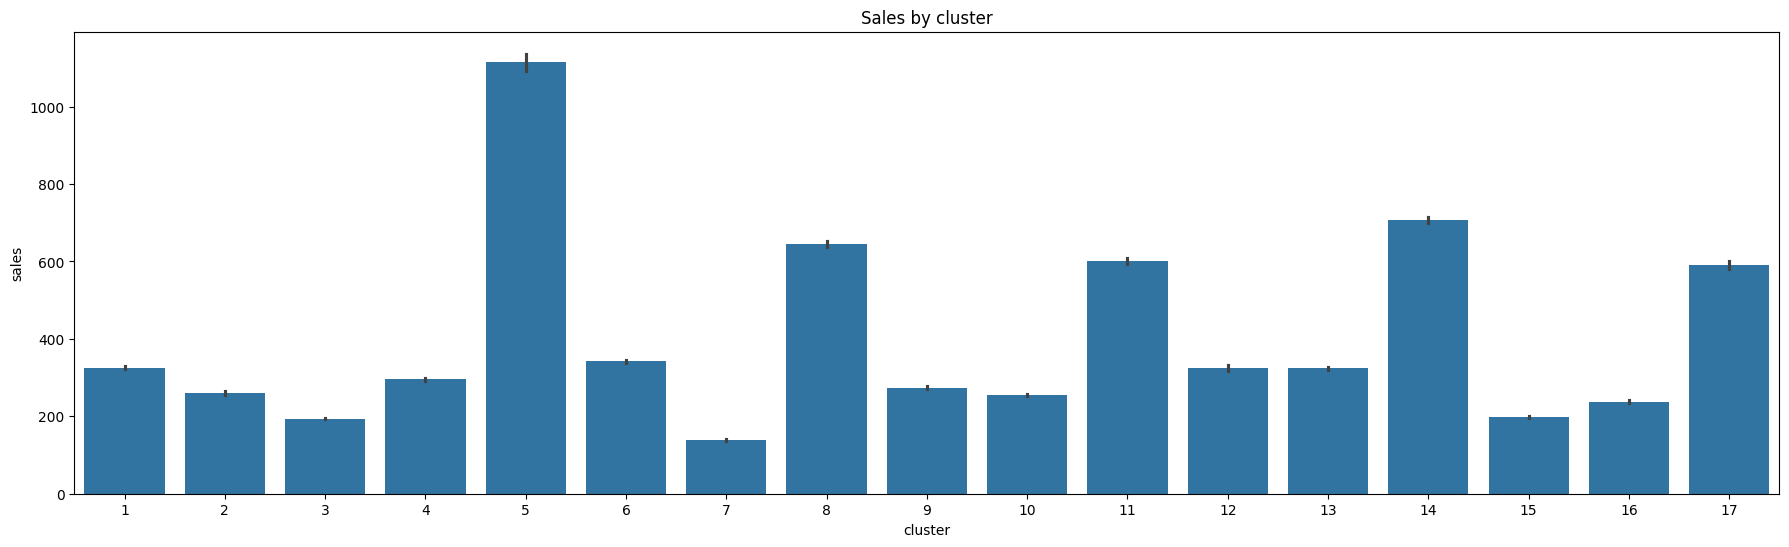

In [166]:
plt.figure(figsize=(22,6))
sns.barplot(x="cluster", y="sales", data=merge1)
plt.title("Sales by cluster")

6. Are sales affected by promotions, oil prices and holidays?

In [168]:
merge1.head()

store_nbr      family  sales  onpromotion month_name  month  year  day  \
0          1  AUTOMOTIVE    0.0          0.0    January      1  2013    1   
1          1   BABY CARE    0.0          0.0    January      1  2013    1   
2          1      BEAUTY    0.0          0.0    January      1  2013    1   
3          1   BEVERAGES    0.0          0.0    January      1  2013    1   
4          1       BOOKS    0.0          0.0    January      1  2013    1   

   Unnamed: 0   city      state type  cluster  
0           0  Quito  Pichincha    D       13  
1           0  Quito  Pichincha    D       13  
2           0  Quito  Pichincha    D       13  
3           0  Quito  Pichincha    D       13  
4           0  Quito  Pichincha    D       13

In [237]:
no_promotion_df = merge1[merge1["onpromotion"] == 0]

## format with commas using an f-string
no_promotion_data_points = f'{no_promotion_df.shape[0]:,}'
print(f'Number of datapoints with no promotion is {no_promotion_data_points}')

Number of datapoints with no promotion is 2,396,687


In [238]:
no_promotion_df = merge1[merge1["onpromotion"] > 0]

## format with commas using an f-string
no_promotion_data_points = f'{no_promotion_df.shape[0]:,}'
print(f'Number of datapoints with no promotion is {no_promotion_data_points}')

Number of datapoints with no promotion is 611,329


In [240]:
no_promotion_df = merge1[merge1["onpromotion"] == 0]
no_promotion_df = no_promotion_df.groupby("family")["sales"].sum().reset_index().sort_values(by="sales")
##adding thousands seperated commas to sales column
no_promotion_df["sales_format"] = no_promotion_df["sales"].apply(lambda x: f'{x:,.0f}')
no_promotion_df = no_promotion_df.nlargest(10, "sales")
no_promotion_df

family         sales sales_format
12      GROCERY I  9.253839e+07   92,538,394
3       BEVERAGES  5.069715e+07   50,697,146
30        PRODUCE  4.764651e+07   47,646,514
7        CLEANING  3.563477e+07   35,634,773
28        POULTRY  2.231944e+07   22,319,444
8           DAIRY  2.156799e+07   21,567,990
24          MEATS  2.105444e+07   21,054,437
5    BREAD/BAKERY  1.974987e+07   19,749,869
25  PERSONAL CARE  1.164143e+07   11,641,426
9            DELI  1.141128e+07   11,411,278

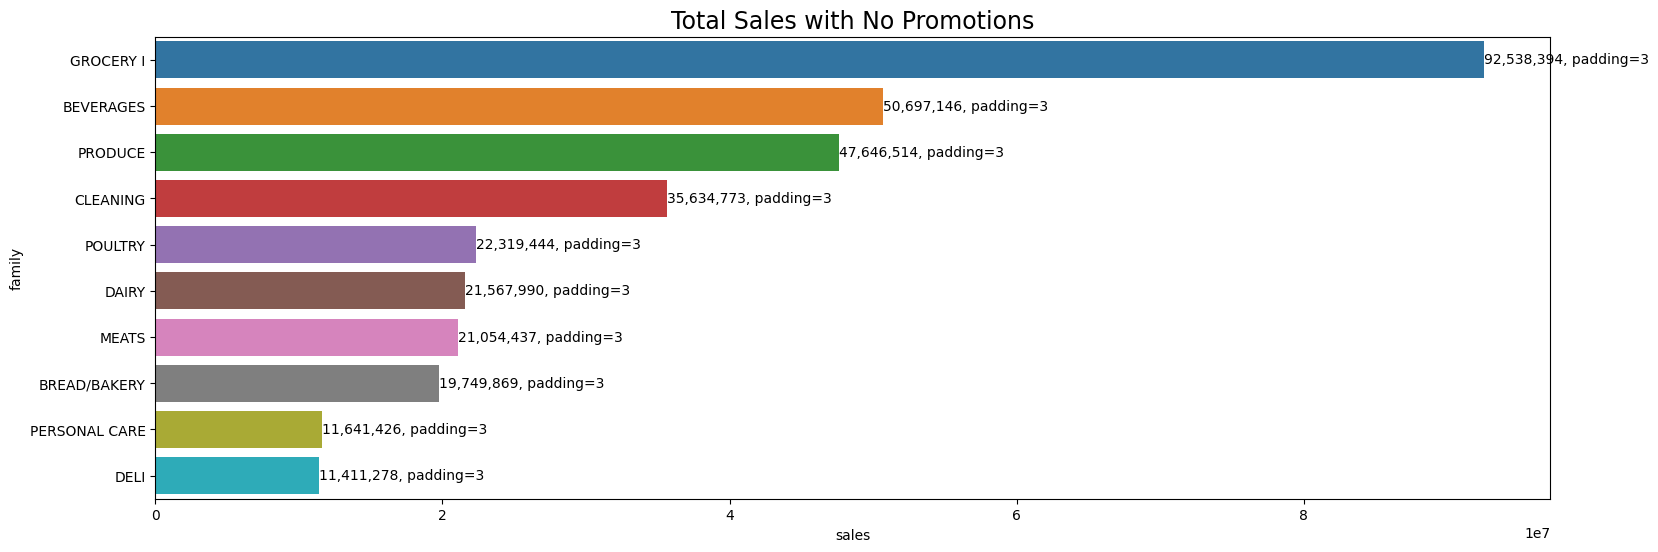

In [242]:
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=no_promotion_df , x="sales", y="family", palette = "tab10")

## add bar labels with thousand seperators and padding for visibility

for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}, padding=3") 
plt.title("Total Sales with No Promotions", fontsize=17)
plt.show()

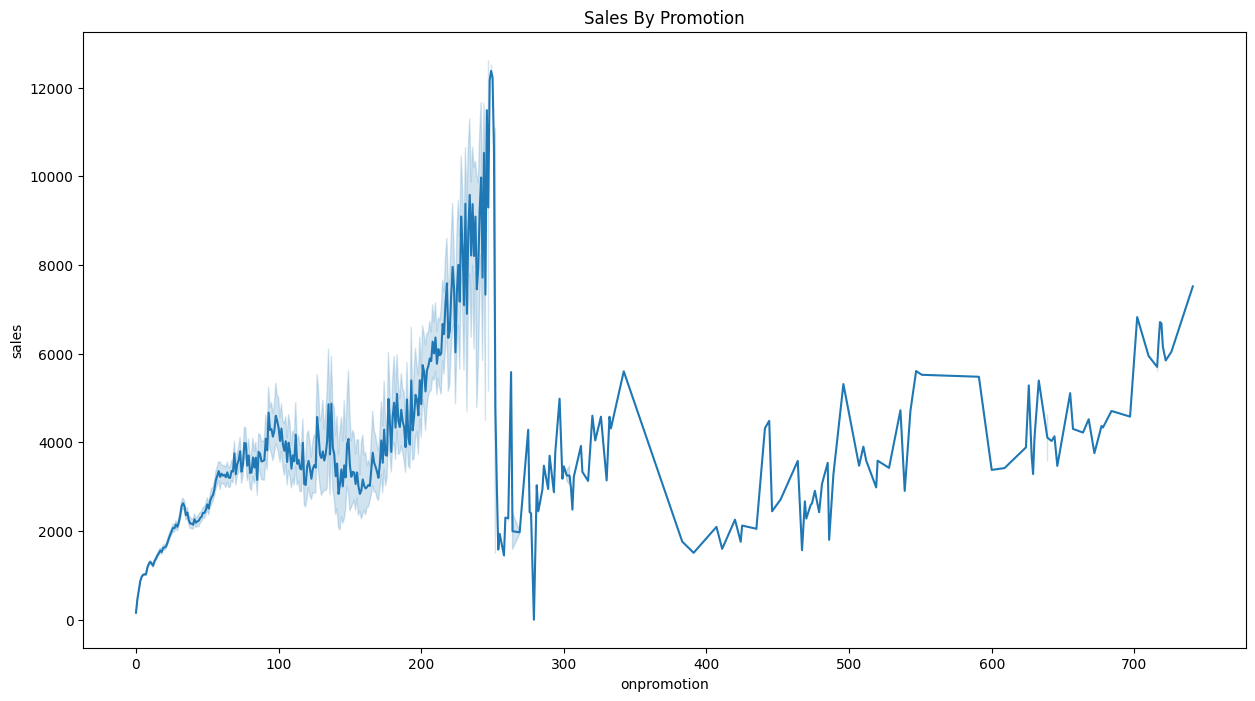

In [371]:
sns.lineplot(data=full_merge, x="onpromotion", y="sales")
plt.title("Sales By Promotion")
plt.show()

Oil Data analysis

In [265]:
df_oil.head()

Unnamed: 0        date  dcoilwtico
0           0  2013-01-01         NaN
1           1  2013-01-02   93.139999
2           2  2013-01-03   92.970001
3           3  2013-01-04   93.120003
4           4  2013-01-07   93.199997

In [266]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1218 non-null   int64  
 1   date        1218 non-null   object 
 2   dcoilwtico  1175 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ KB


In [268]:
df_oil["date"] = pd.to_datetime(df_oil["date"])

In [269]:
df_oil.head()

Unnamed: 0       date  dcoilwtico
0           0 2013-01-01         NaN
1           1 2013-01-02   93.139999
2           2 2013-01-03   92.970001
3           3 2013-01-04   93.120003
4           4 2013-01-07   93.199997

In [270]:
df_oil = df_oil.drop(columns="Unnamed: 0")

In [272]:
df_oil.set_index("date", inplace=True)

In [273]:
df_oil.head()

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02   93.139999
2013-01-03   92.970001
2013-01-04   93.120003
2013-01-07   93.199997

Checking for data completeness in the oil data

In [274]:
oil_start_date = df_oil.index.min()
oil_end_date = df_oil.index.max()

print(f"Oil Start date is {oil_start_date}")
print(f"Oil End date is {oil_end_date}")

Oil Start date is 2013-01-01 00:00:00
Oil End date is 2017-08-31 00:00:00


In [275]:
##checking for data completeness
start_day = df_train.index.min()
end_day = df_train.index.max()

print(f'train start day is {start_day}')
print(f'train end day is {end_day}')

train start day is 2013-01-01 00:00:00
train end day is 2017-08-15 00:00:00


In [276]:
df_oil.index.size

1218

In [277]:
date_range.size

1688

In [278]:
##Finding the missing days from the date column
missing_oil_dates = date_range.difference(df_oil.index)
print(f"Total missing days:{missing_oil_dates.nunique()}")
missing_oil_dates

Total missing days:482


DatetimeIndex(['2013-01-05', '2013-01-06', '2013-01-12', '2013-01-13',
               '2013-01-19', '2013-01-20', '2013-01-26', '2013-01-27',
               '2013-02-02', '2013-02-03',
               ...
               '2017-07-15', '2017-07-16', '2017-07-22', '2017-07-23',
               '2017-07-29', '2017-07-30', '2017-08-05', '2017-08-06',
               '2017-08-12', '2017-08-13'],
              dtype='datetime64[ns]', length=482, freq=None)

In [279]:
missing_days_df = pd.DataFrame(missing_oil_dates, columns = ["date"])
missing_days_df.head()

date
0 2013-01-05
1 2013-01-06
2 2013-01-12
3 2013-01-13
4 2013-01-19

In [281]:
missing_days_df["Day of the week"] = missing_days_df["date"].apply(lambda x: x.day_name())
missing_days_df.set_index("date", inplace=True)

In [282]:
missing_days_df.head()


Day of the week
date                      
2013-01-05        Saturday
2013-01-06          Sunday
2013-01-12        Saturday
2013-01-13          Sunday
2013-01-19        Saturday

In [284]:
missing_days_df["Day of the week"].unique()

array(['Saturday', 'Sunday'], dtype=object)

Observation
- We can see that the missing dates happen to be Saturday and sunday
- This might probably mean that oil prices are not recorded on weekends
- Since Oil prices cant be replaced by zero, because though oil prices are not recorded, the price still remains the same on weekends
- Hence we will use forward fill to fill all missing oil prices


In [285]:
missing_days_df.isna().sum()

Day of the week    0
dtype: int64

In [287]:
full_oil_data = pd.concat([df_oil, missing_days_df])
full_oil_data.isna().sum()

dcoilwtico          525
Day of the week    1218
dtype: int64

In [288]:
full_oil_data.drop("Day of the week", axis=1, inplace=True)

In [289]:
full_oil_data.head()

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02   93.139999
2013-01-03   92.970001
2013-01-04   93.120003
2013-01-07   93.199997

In [290]:
full_oil_data["dcoilwtico"] = full_oil_data["dcoilwtico"].fillna(method ="ffill")
full_oil_data.head()

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02   93.139999
2013-01-03   92.970001
2013-01-04   93.120003
2013-01-07   93.199997

In [291]:
full_oil_data.isna().sum()

dcoilwtico    1
dtype: int64

In [292]:
full_oil_data.loc["2013-01-01"]

dcoilwtico   NaN
Name: 2013-01-01 00:00:00, dtype: float64

In [293]:
full_oil_data.loc["2013-01-01"] = 93.14

In [294]:
full_oil_data.isna().sum()

dcoilwtico    0
dtype: int64

In [295]:
##filtering out excess days
excess_oil_days = full_oil_data[full_oil_data.index > "2017-08-15"]
excess_oil_days

dcoilwtico
date                  
2017-08-16   46.799999
2017-08-17   47.070000
2017-08-18   48.590000
2017-08-21   47.389999
2017-08-22   47.650002
2017-08-23   48.450001
2017-08-24   47.240002
2017-08-25   47.650002
2017-08-28   46.400002
2017-08-29   46.459999
2017-08-30   45.959999
2017-08-31   47.259998

In [307]:
full_oil_data = full_oil_data[~full_oil_data.index.isin(excess_oil_days.index)]


In [308]:
full_oil_data

dcoilwtico
date                  
2013-01-01   93.140000
2013-01-02   93.139999
2013-01-03   92.970001
2013-01-04   93.120003
2013-01-07   93.199997
...                ...
2017-07-30   47.259998
2017-08-05   47.259998
2017-08-06   47.259998
2017-08-12   47.259998
2017-08-13   47.259998

[1688 rows x 1 columns]

In [311]:
full_oil_data_df = full_oil_data.rename(columns={"dcoilwtico" : "oil_price"})
full_oil_data_df.head()

oil_price
date                 
2013-01-01  93.140000
2013-01-02  93.139999
2013-01-03  92.970001
2013-01-04  93.120003
2013-01-07  93.199997

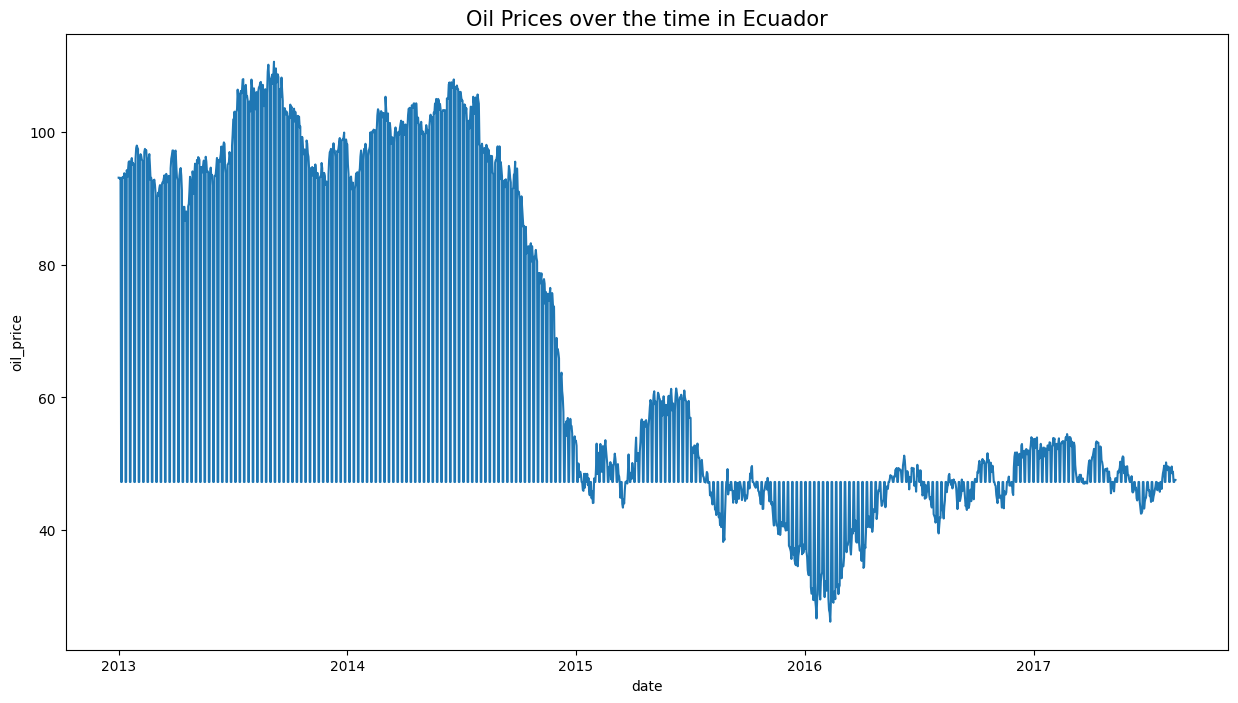

In [314]:
sns.lineplot(data=full_oil_data_df, x=full_oil_data_df.index, y=full_oil_data_df.oil_price)
plt.title("Oil Prices over the time ", fontsize=15)
plt.show()

In [593]:
sales_by_day = full_train_data.groupby(full_train_data.index)["sales"].sum().reset_index()

sales_by_day.head()


date          sales
0 2013-01-01    2511.618999
1 2013-01-02  496092.417944
2 2013-01-03  361461.231124
3 2013-01-04  354459.677093
4 2013-01-05  477350.121229

In [595]:
full_oil_data_reset = full_oil_data.reset_index()
full_oil_data_reset.head()

date  dcoilwtico
0 2013-01-01   93.140000
1 2013-01-02   93.139999
2 2013-01-03   92.970001
3 2013-01-04   93.120003
4 2013-01-07   93.199997

In [601]:
full_oil_data_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1688 non-null   datetime64[ns]
 1   dcoilwtico  1688 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.5 KB


In [603]:
# Convert the "date" column to datetime format
full_oil_data_reset["date"] = pd.to_datetime(full_oil_data_reset['date'])

In [604]:
# Merge the datasets on the "date" column
merged_oil_sales = pd.merge(sales_by_day, full_oil_data_reset, on='date', how='inner')

# Display the merged dataset
print(merged_oil_sales)


           date          sales  dcoilwtico
0    2013-01-01    2511.618999   93.140000
1    2013-01-02  496092.417944   93.139999
2    2013-01-03  361461.231124   92.970001
3    2013-01-04  354459.677093   93.120003
4    2013-01-05  477350.121229   47.259998
...         ...            ...         ...
1683 2017-08-11  826373.722022   48.810001
1684 2017-08-12  792630.535079   47.259998
1685 2017-08-13  865639.677471   47.259998
1686 2017-08-14  760922.406081   47.590000
1687 2017-08-15  762661.935939   47.570000

[1688 rows x 3 columns]


In [605]:
merged_oil_sales.set_index("date", inplace=True)

In [606]:
merged_oil_sales.head()

sales  dcoilwtico
date                                 
2013-01-01    2511.618999   93.140000
2013-01-02  496092.417944   93.139999
2013-01-03  361461.231124   92.970001
2013-01-04  354459.677093   93.120003
2013-01-05  477350.121229   47.259998

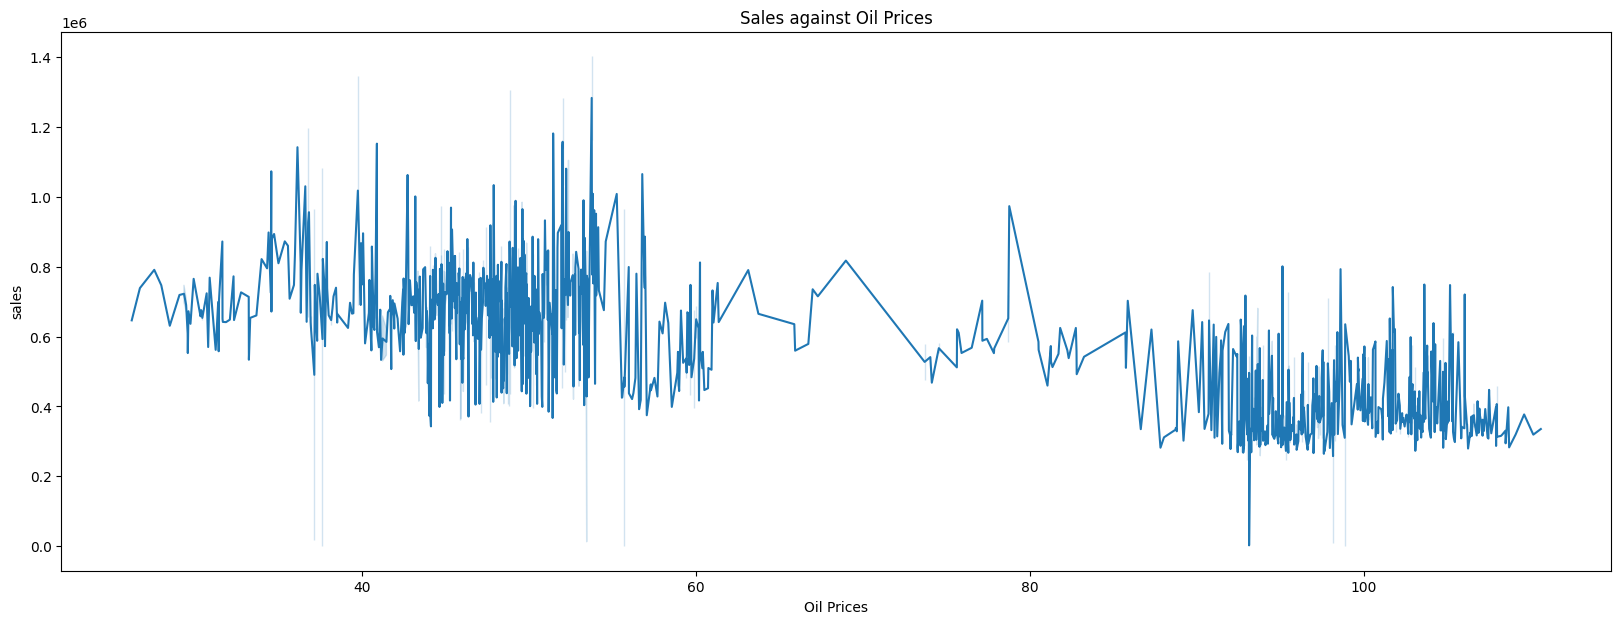

In [610]:
plt.figure(figsize=(20,7))
sns.lineplot(data=merged_oil_sales, x="dcoilwtico", y="sales")
plt.title("Sales against Oil Prices")
plt.xlabel("Oil Prices")
plt.show()

Observations from the Sales against Oil prices
- There is a lot of haphazard movement of sales as oil prices increases 
- We can see that there is a clear trend though its not too much, but then while oil prices increases over time, the sales made decreases

7. What analysis can we get from the date and its extractable features?

In [615]:
sales_by_year = merge1.groupby("year")["sales"].sum().reset_index()
sales_by_year.head()

year         sales
0  2013  1.404190e+08
1  2014  2.094742e+08
2  2015  2.408801e+08
3  2016  2.886545e+08
4  2017  1.942171e+08

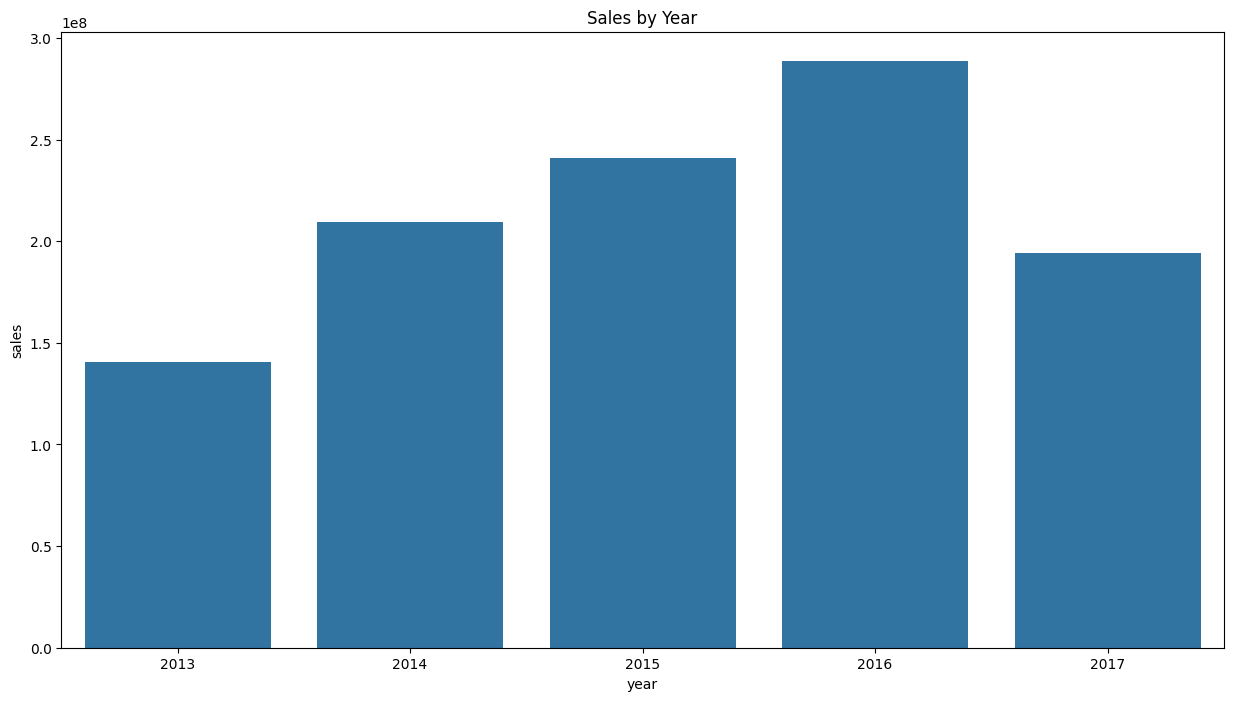

In [616]:
sns.barplot(data=sales_by_year, x="year", y="sales")
plt.title("Sales by Year")
plt.show()

In [623]:
sales_by_month = merge1.groupby("month_name")["sales"].sum().reset_index().sort_values(by="sales")
sales_by_month.head()

month_name         sales
11  September  7.747368e+07
10    October  8.008038e+07
9    November  8.033579e+07
3    February  8.063723e+07
1      August  8.347238e+07

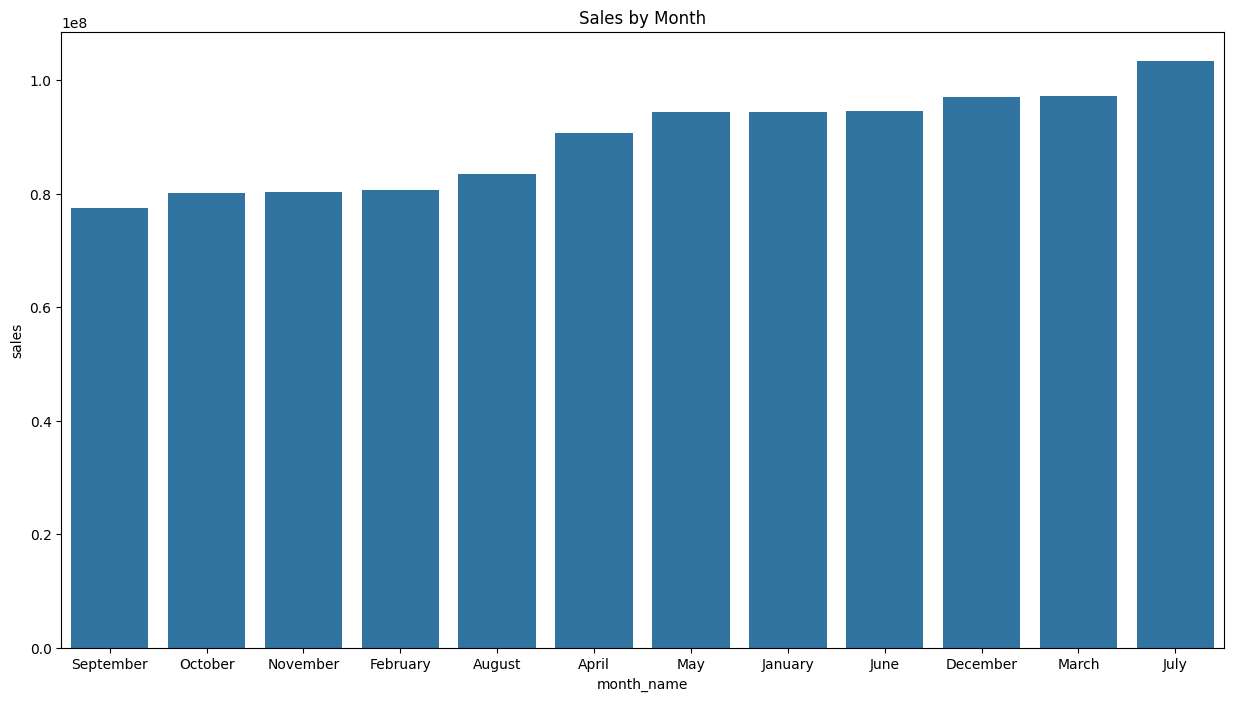

In [624]:
sns.barplot(data=sales_by_month, x="month_name", y="sales")
plt.title("Sales by Month")
plt.show()

In [629]:
sales_by_dow = merge1.groupby("day")["sales"].sum().reset_index().sort_values(by="day")
sales_by_dow.head()

day         sales
0    0  1.488278e+08
1    1  1.379221e+08
2    2  1.423787e+08
3    3  1.212646e+08
4    4  1.390978e+08

In [631]:
day_names = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

# Convert the "day" column to day names
sales_by_dow['day'] = sales_by_dow['day'].map(day_names)

# Display the DataFrame with day names
print(sales_by_dow)

         day         sales
0     Monday  1.488278e+08
1    Tuesday  1.379221e+08
2  Wednesday  1.423787e+08
3   Thursday  1.212646e+08
4     Friday  1.390978e+08
5   Saturday  1.861015e+08
6     Sunday  1.980523e+08


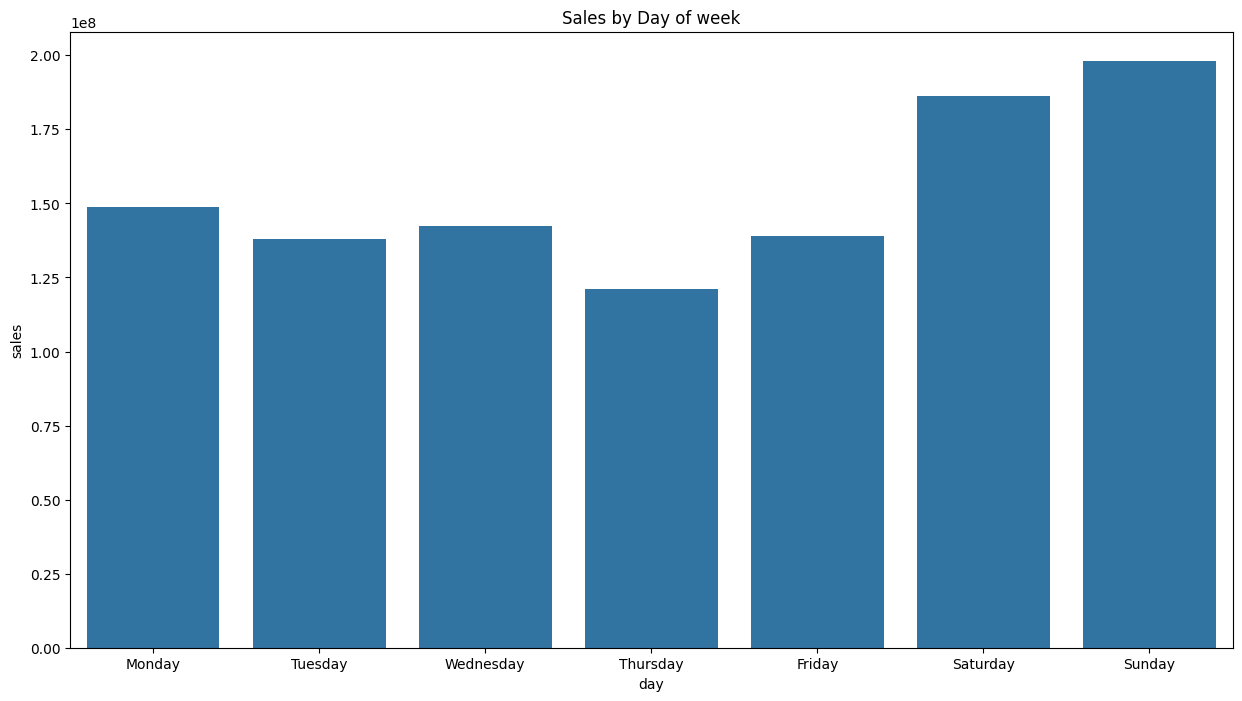

In [633]:
sns.barplot(data=sales_by_dow, x="day", y="sales")
plt.title("Sales by Day of week")
plt.show()

Observations of sales against various months, years, and days
- It is observed that monday, saturday and sunday respectively recorded the most sales while thursday was the worst in terms of sales
- It is observed that June, December, March, July respectively recorded the highest sales while September, October and November respectivley recorded lowest sales
- 2016 had the highest sales whereas 2013 has the least

8. What product family and stores did the promotions affect?

In [637]:
merge1['promotion_status'] = np.where(merge1['onpromotion'] == 0, 'NO', 'YES')

In [640]:
promo = merge1.groupby(["store_nbr", "promotion_status"])["sales"].sum().reset_index()
promo.head()

store_nbr promotion_status         sales
0          1               NO  5.558294e+06
1          1              YES  8.586719e+06
2          2               NO  7.628808e+06
3          2              YES  1.392858e+07
4          3               NO  1.767237e+07

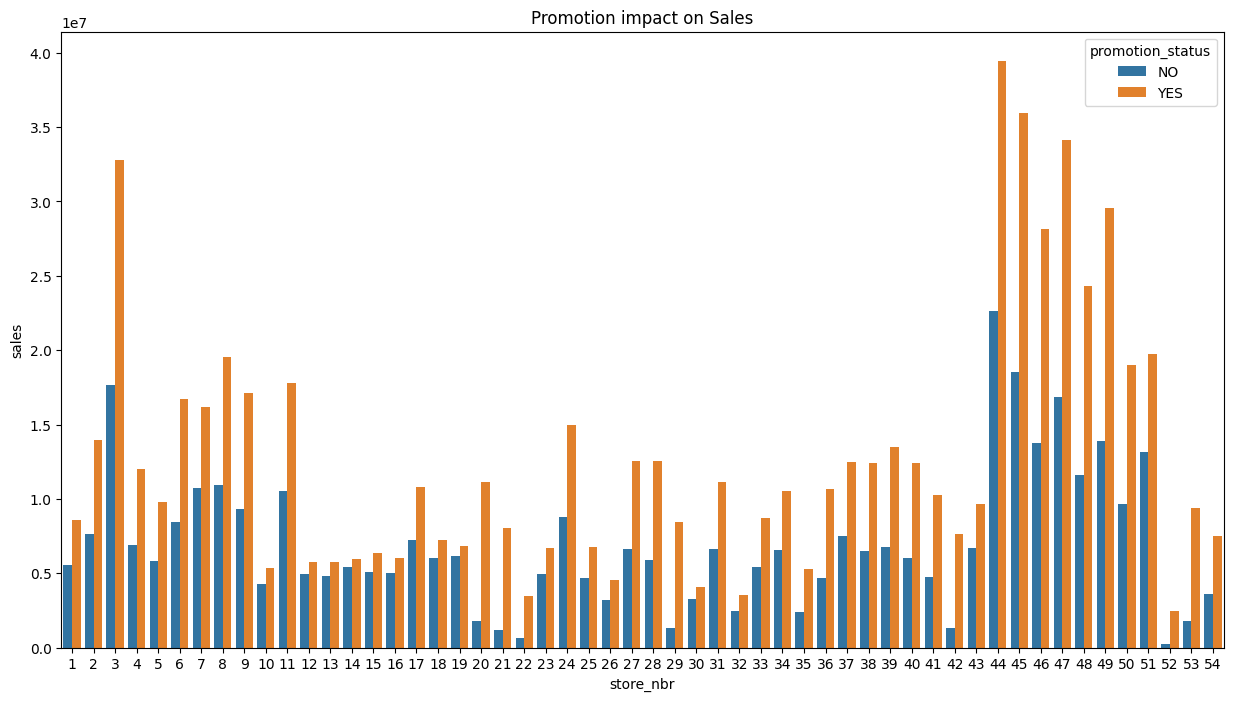

In [643]:
sns.barplot(data=promo , x="store_nbr", y="sales", hue="promotion_status")
plt.title("Promotion impact on Sales")
plt.show()

In [645]:
fam = merge1.groupby(["family", "promotion_status"])["sales"].sum().reset_index()
fam.head()

family promotion_status     sales
0  AUTOMOTIVE               NO  514381.0
1  AUTOMOTIVE              YES   40441.0
2   BABY CARE               NO    9963.0
3   BABY CARE              YES      88.0
4      BEAUTY               NO  245719.0

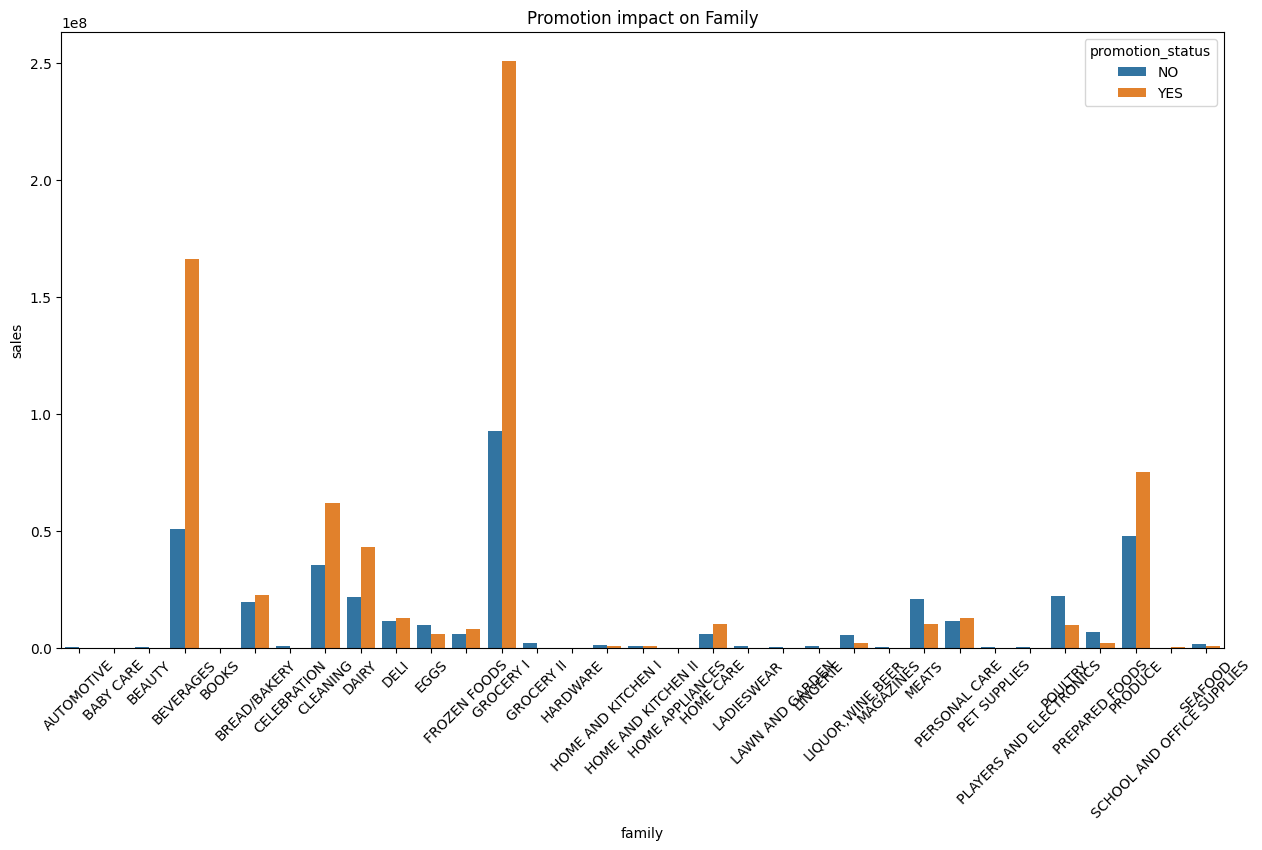

In [647]:
sns.barplot(data=fam , x="family", y="sales", hue="promotion_status")
plt.title("Promotion impact on Family")
plt.xticks(rotation=45)
plt.show()

Observation
- It is good to note that majority of the total sales from each store comes from products on promotion
- Also it is vital to note that, out of the 33 families, only 9 of them have majority of their total sales from products on promotion.


9. What is the difference between RMSLE, RMSE, MSE(or why is the MAE greater than all of them?)

RMSLE (Root Mean Squared Logarithmic Error): is similar to RMSE (Root Mean Squared Error) but applies a logarithmic transformation to the predicted and actual values before calculating the error. This makes RMSLE more tolerant to underestimation of the actual values.

MAE (Mean Absolute Error): measures the average magnitude of the errors in a set of predictions, without considering their direction.

MAE : is often greater than RMSE and RMSLE because it doesn't square the errors, so it doesn't penalize large errors as much as RMSE and RMSLE.


10. Does the payment of wages in the public sector on the 15th and the last days of the month influence the store sales?

In [651]:
group_df = full_train_data.groupby(full_train_data.index)["sales"].sum().reset_index()
group_df

date          sales
0    2013-01-01    2511.618999
1    2013-01-02  496092.417944
2    2013-01-03  361461.231124
3    2013-01-04  354459.677093
4    2013-01-05  477350.121229
...         ...            ...
1683 2017-08-11  826373.722022
1684 2017-08-12  792630.535079
1685 2017-08-13  865639.677471
1686 2017-08-14  760922.406081
1687 2017-08-15  762661.935939

[1688 rows x 2 columns]

In [653]:
# Extract the day part
group_df['day'] = group_df['date'].dt.day
group_df.head()


date          sales  day
0 2013-01-01    2511.618999    1
1 2013-01-02  496092.417944    2
2 2013-01-03  361461.231124    3
3 2013-01-04  354459.677093    4
4 2013-01-05  477350.121229    5

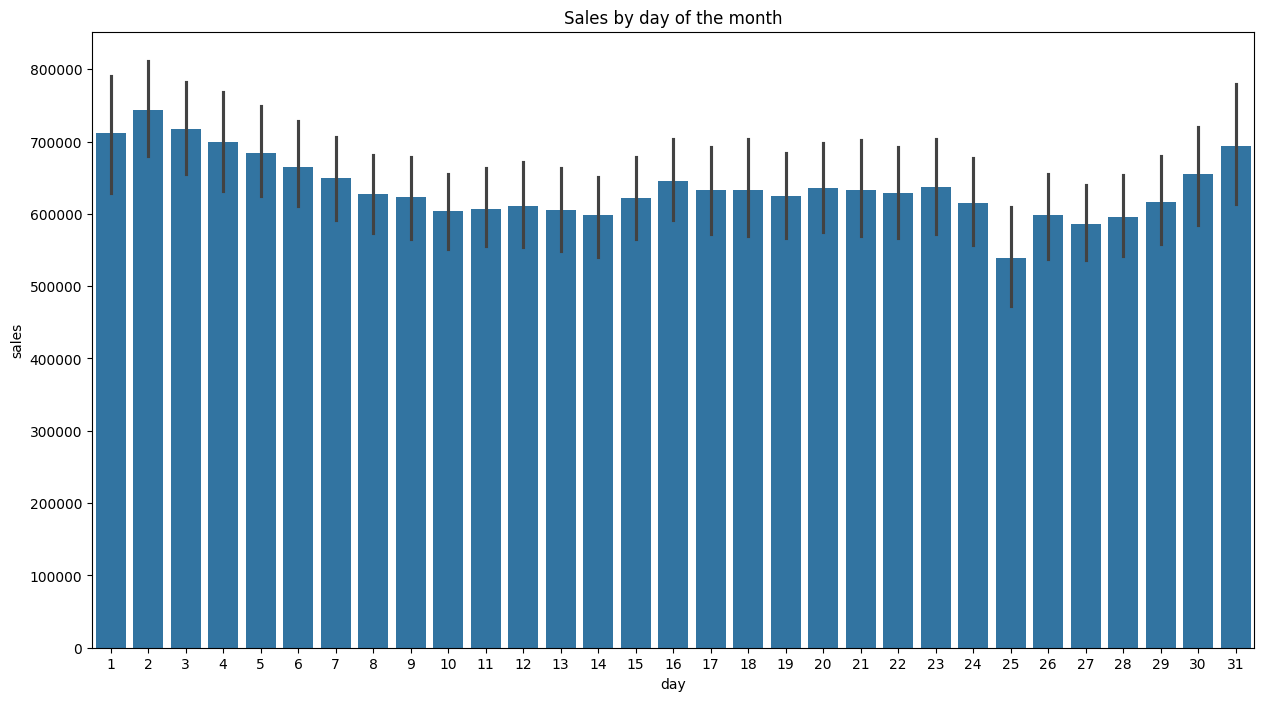

In [654]:
sns.barplot(data=group_df, x="day", y="sales")
plt.title("Sales by day of the month")
plt.show()

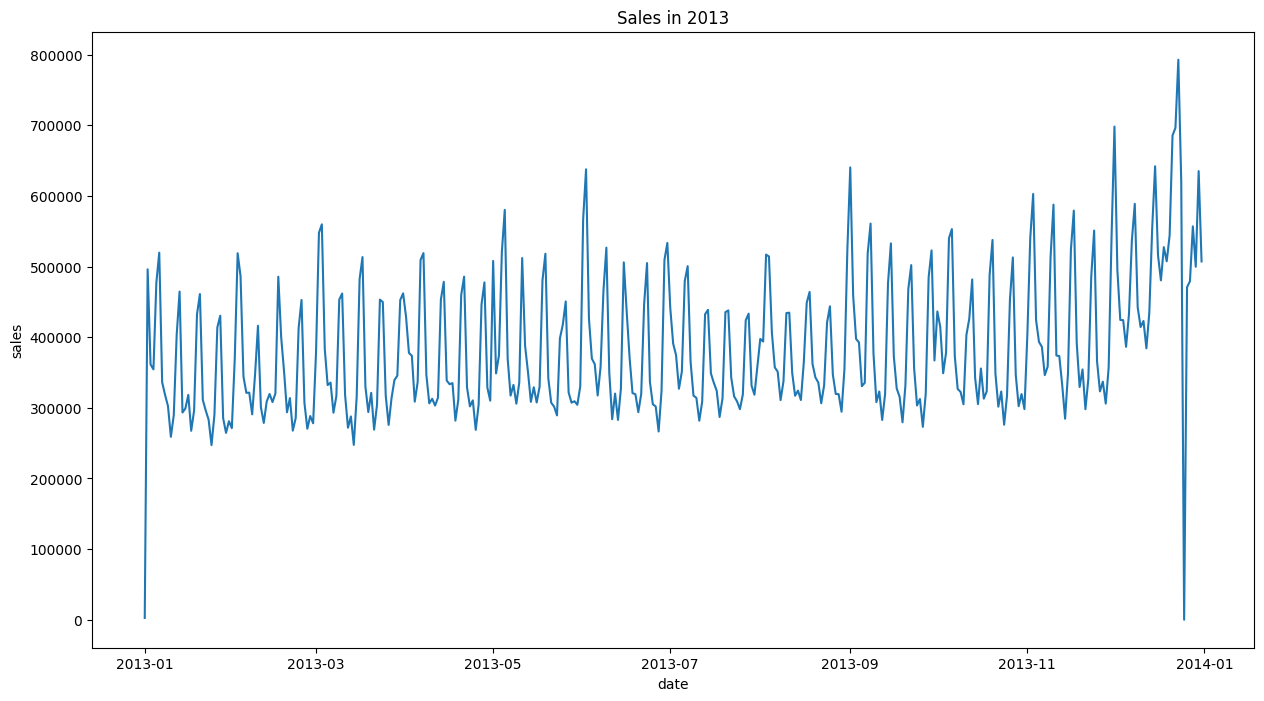

In [660]:
group_df_2013 = group_df[group_df['date'].dt.year == 2013]

# Plotting
sns.lineplot(data=group_df_2013, x="date", y="sales")
plt.title("Sales in 2013")
plt.show()

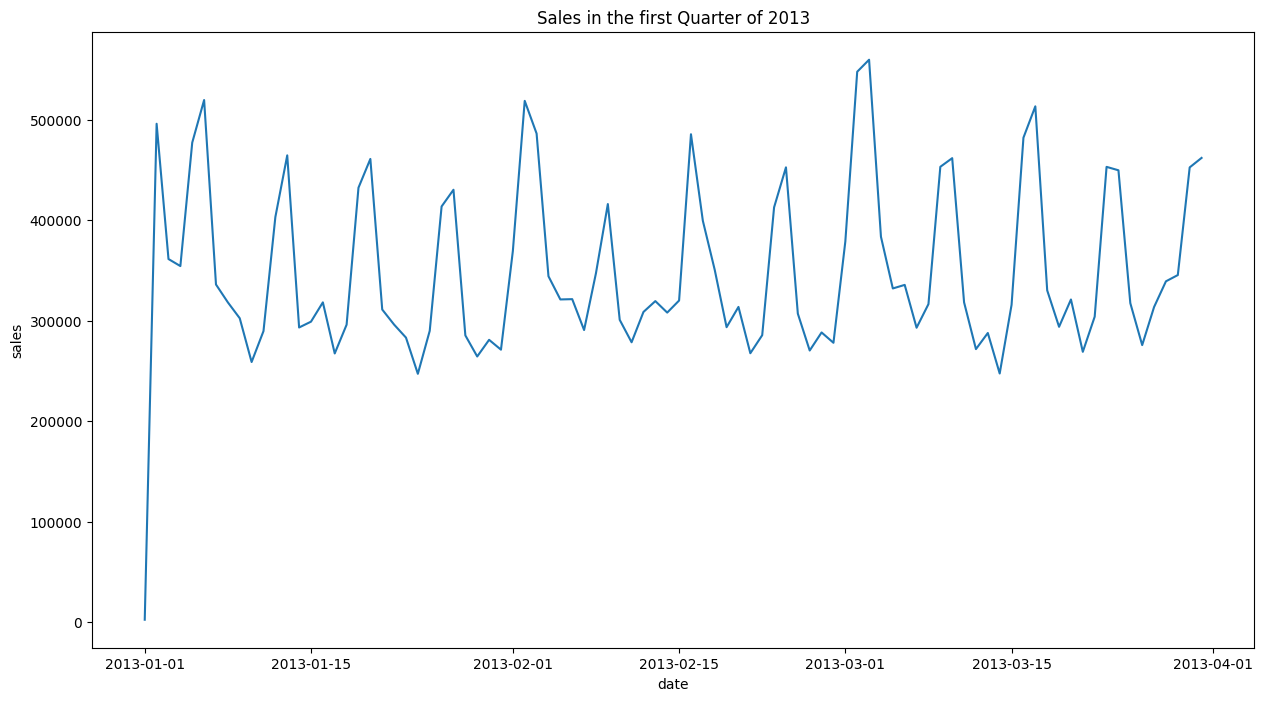

In [665]:

group_df_2013 = group_df[group_df['date'].dt.year == 2013]
quaterway_date = pd.Timestamp("2013-04-01")  # quater point in the year

# Filter the DataFrame to include only the first half of the year
group_df_first_quarter = group_df_2013[group_df_2013['date'] < quaterway_date]

# Plotting
sns.lineplot(data=group_df_first_quarter, x="date", y="sales")
plt.title("Sales in the first Quarter of 2013")
plt.show()


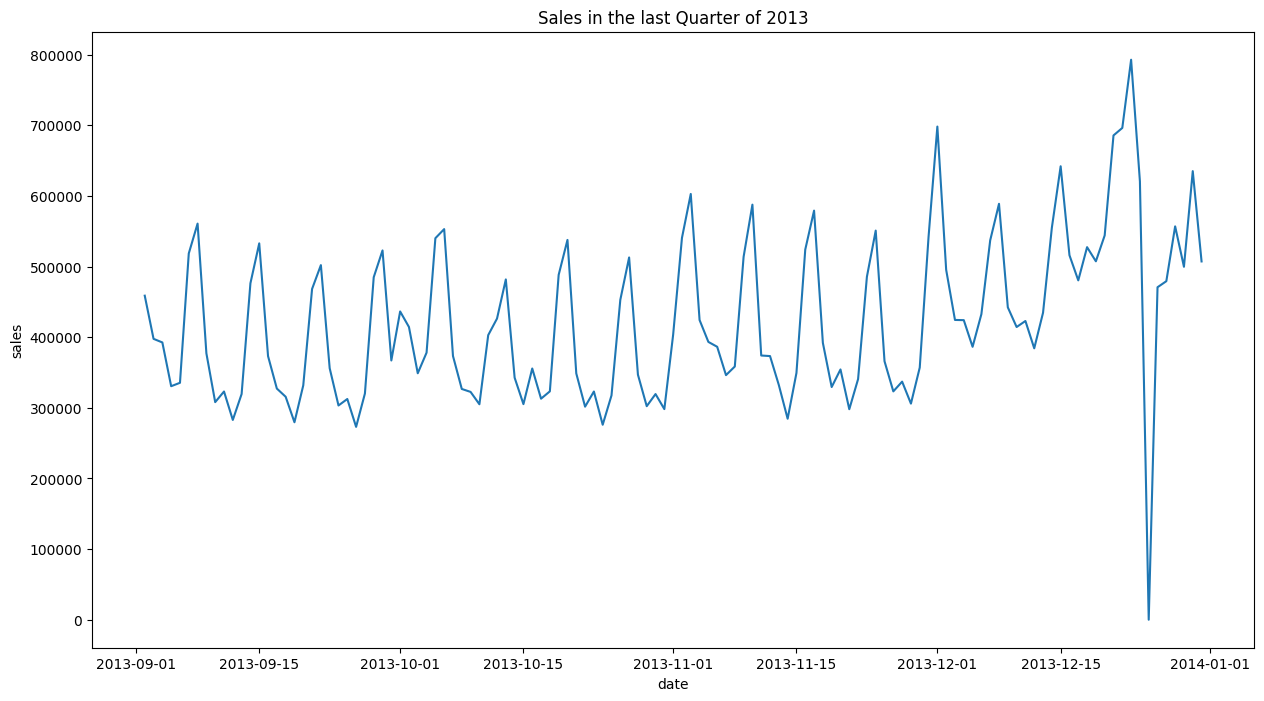

In [668]:

group_df_2013 = group_df[group_df['date'].dt.year == 2013]
last_quater_date = pd.Timestamp("2013-09-01")  # last quater point in the year

# Filter the DataFrame to include only the last quater of the year
group_df_last_quarter = group_df_2013[group_df_2013['date'] > last_quater_date]

# Plotting
sns.lineplot(data=group_df_last_quarter, x="date", y="sales")
plt.title("Sales in the last Quarter of 2013")
plt.show()

Observations of sales on 15th and last days of the month
- We can see 27th to 31st has total sales following each other in that respective order. Indicating higher sales as months end
- With the 15th being pay day, not much can be derived from its effect on sales

In [326]:
df_main = full_train_data

#### Data Preperation

Methods for making data stationary 
1. Detrending: Differencing & Seasonal differencing: y(t) = y(t) - y(t-1)
2. Rolling Stats - Moving Average
3. Tranformation: log, sqrt, cbrt + differencing

Differencing

In [328]:
## differencing(making our dataset more stationary )
df_main["sales_diff1"] = df_main["sales"] - df_main["sales"].shift(1)
df_main

store_nbr                      family  sales  onpromotion  \
date                                                                    
2013-01-01          1                  AUTOMOTIVE    0.0          0.0   
2013-01-01          1                   BABY CARE    0.0          0.0   
2013-01-01          1                      BEAUTY    0.0          0.0   
2013-01-01          1                   BEVERAGES    0.0          0.0   
2013-01-01          1                       BOOKS    0.0          0.0   
...               ...                         ...    ...          ...   
2016-12-25          9                     POULTRY    0.0          0.0   
2016-12-25          9              PREPARED FOODS    0.0          0.0   
2016-12-25          9                     PRODUCE    0.0          0.0   
2016-12-25          9  SCHOOL AND OFFICE SUPPLIES    0.0          0.0   
2016-12-25          9                     SEAFOOD    0.0          0.0   

           month_name  month  year  day  sales_diff1  
date                                                  
2013-01-01    January      1  2013    1          NaN  
2013-01-01    January      1  2013    1          0.0  
2013-01-01    January      1  2013    1          0.0  
2013-01-01    January      1  2013    1          0.0  
2013-01-01    January      1  2013    1          0.0  
...               ...    ...   ...  ...          ...  
2016-12-25   December     12  2016    6          0.0  
2016-12-25   December     12  2016    6          0.0  
2016-12-25   December     12  2016    6          0.0  
2016-12-25   December     12  2016    6          0.0  
2016-12-25   December     12  2016    6          0.0  

[3008016 rows x 9 columns]

In [335]:
##grouping by days and reindexing before passing into our statistical model
df_main_diff = df_main.groupby([df_main.index])["sales_diff1"].sum().reset_index()
df_main_diff.set_index("date", inplace=True)
df_main_diff

sales_diff1
date                   
2013-01-01     0.000000
2013-01-02    29.214000
2013-01-03    -4.214000
2013-01-04   -14.000000
2013-01-05    17.361000
...                 ...
2017-08-11     9.481000
2017-08-12    -6.971999
2017-08-13     3.140999
2017-08-14    -3.000000
2017-08-15    -1.000000

[1688 rows x 1 columns]

In [340]:
## checking if our dataset has succesfully been made stationary enough(constant mean and covariance with time)
## using the adfuller test
# Downsampling the dataset to daily frequency to check for stationarity
df_resampled = df_main_diff['sales_diff1']

# Applying the ADF test to the downsampled dataset
result = adfuller(df_resampled.dropna())

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', f"{result[1]:.30f}")

if result [1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")


ADF Statistic: -13.806449914863082
p-value: 0.000000000000000000000000083848
Data is stationary


Observation
- We can see how small the p value is very small
- In conclusion, we have been able to make our dataset more stationary by applying the differencing method

In [342]:
## Dividing our dataset into train test
## since this is Time series, we have to manually split the data to ensure that the split considers time instead of randomly splitting
df_main_diff

1688

In [350]:
## manually splitting our data into approx. 80 20% for train and test to ensure order/sequence
train = df_main_diff.loc[df_main_diff.index < "2016-09-11"]
test = df_main_diff.loc[df_main_diff.index >= "2016-09-11"]

In [351]:
##checking rows assigned to train and test
train.size , test.size

(1349, 339)

In [384]:
## getting optimal parameters by running auto_arima model
sarima_model = auto_arima(                                  ## by using auto_arima, the optimal hyperparameters can be obtained
    train["sales_diff1"], 
    seasonal=True,                                          ## True just in case there is some seasonality we cant see
    m=7,                                                     ## window of 7 for best performance
    stepwise=True                                           ## goes throught the training data and finds the best hyperparameters to use
)

print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1349
Model:             SARIMAX(1, 0, 5)x(1, 0, [1], 7)   Log Likelihood               -4561.260
Date:                             Mon, 13 May 2024   AIC                           9142.521
Time:                                     01:57:03   BIC                           9194.592
Sample:                                 01-01-2013   HQIC                          9162.022
                                      - 09-10-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.001      0.130      0.897      -0.002       0.002
ar.L1          0.1680      

In [385]:
print("Sarima Order", sarima_model.order)
print("Sarima Seasonal Order", sarima_model.seasonal_order)

Sarima Order (1, 0, 5)
Sarima Seasonal Order (1, 0, 1, 7)


Insights
- p = 3 indictaing the model will use a lag of 3 for autoregression
- d = 0 indicating there will be no differencing performed (Probably because we have handled that already)
- q = 3 indicating Moving average with a window of 3 will be used


In [386]:
##training our sarima model
sarima_model.fit(train["sales_diff1"])

ARIMA(order=(1, 0, 5), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [387]:
## predicting based on the length of the test data

len_test_period = len(test)
forecast_sales = sarima_model.predict(n_periods= len_test_period)

In [685]:
models_folder = 'models'

# Create the "models" folder 
#os.makedirs(models_folder, exist_ok=True)

# Save the model to a file in the "models" folder
model_file_path = os.path.join(models_folder, 'sarima_model.joblib')
dump(sarima_model, model_file_path)

['models\\sarima_model.joblib']

In [388]:
##cross checking if the test and forecast_sales sizes are the same
forecast_sales.size, test.size

(339, 339)

In [389]:
## Evaluation using mae and rmse metrics
mae = mean_absolute_error(test["sales_diff1"], forecast_sales)
rmse = np.sqrt(mean_squared_error(test["sales_diff1"], forecast_sales))

print(f"The mean absolute error for sarima is: {mae}")
print(f"The root mean squared error for sarima is: {rmse}")

The mean absolute error for sarima is: 7.604713542447859
The root mean squared error for sarima is: 10.140623047843574


##### Sarima results insights
- The root mean squared error of 10.14 means, with every prediction made by our model, the prediction is off by $10.14 which indicates a good performance

In [534]:
forecast_sales

2016-09-11    -3.546308
2016-09-12   -12.270014
2016-09-13    -1.885052
2016-09-14    -1.012668
2016-09-15    -0.079113
                ...    
2017-08-11     0.486837
2017-08-12     7.950362
2017-08-13     2.446443
2017-08-14    -8.507482
2017-08-15    -1.626110
Freq: D, Length: 339, dtype: float64

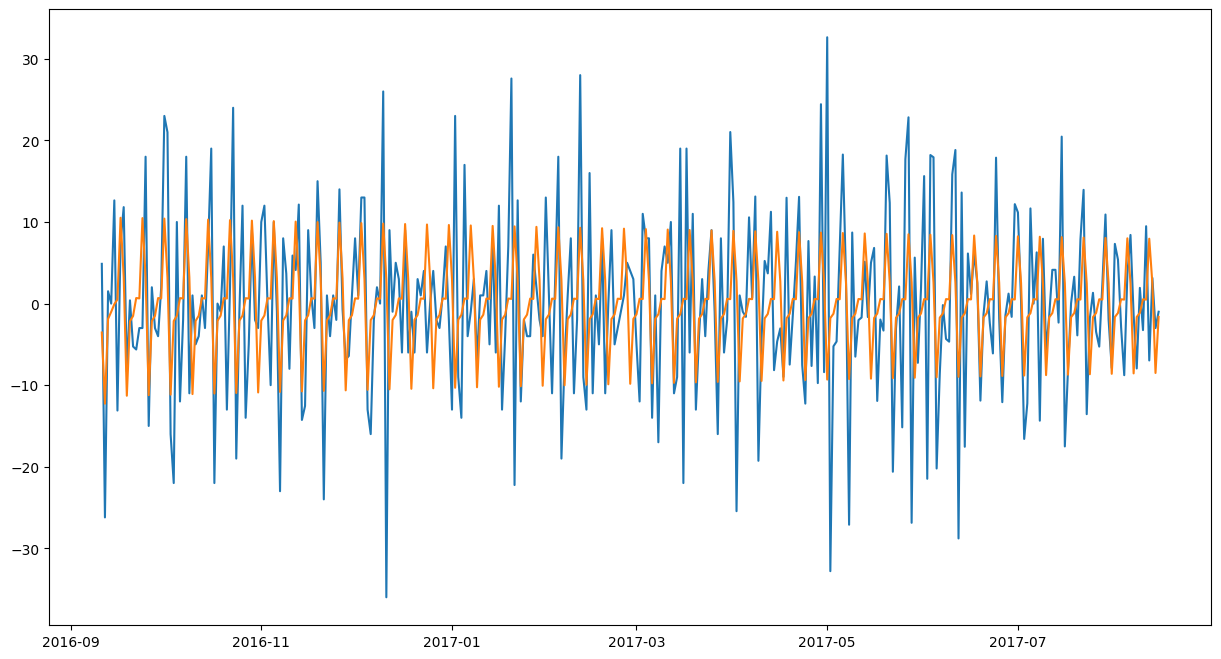

In [390]:
plt.plot(test["sales_diff1"], label ="Test set")
plt.plot(forecast_sales, label ="Forecast sales")
plt.show()

Auto Regression Model

In [402]:
test.size , forecast_ar.size

(339, 1349)

In [579]:
# Assuming df_main_diff is your dataframe with the differenced sales data
train = df_main_diff.loc[df_main_diff.index < "2016-09-11"]
test = df_main_diff.loc[df_main_diff.index >= "2016-09-11"]

# Fitting an ARIMA(1,0,0) model
model_AR = ARIMA(train["sales_diff1"], order=(1, 0, 0))
model_fit = model_AR.fit()

# Forecast
forecast_AR = model_fit.forecast(steps=len(test))

# Print the forecast
print(forecast_AR)


2016-09-11   -9.047214
2016-09-12    3.517851
2016-09-13   -1.351676
2016-09-14    0.535484
2016-09-15   -0.195875
                ...   
2017-08-11    0.008395
2017-08-12    0.008395
2017-08-13    0.008395
2017-08-14    0.008395
2017-08-15    0.008395
Freq: D, Name: predicted_mean, Length: 339, dtype: float64


In [686]:
# Specify the path to the "models" folder
models_folder = 'models'

# Create the "models" folder 
os.makedirs(models_folder, exist_ok=True)

# Save the model to a file in the "models" folder
model_file_path = os.path.join(models_folder, 'AR_model.joblib')
dump(model_AR, model_file_path)

# Forecast
forecast_AR = model_fit.forecast(steps=len(test))

# Print the forecast
print(forecast_AR)

2016-09-11   -9.047214
2016-09-12    3.517851
2016-09-13   -1.351676
2016-09-14    0.535484
2016-09-15   -0.195875
                ...   
2017-08-11    0.008395
2017-08-12    0.008395
2017-08-13    0.008395
2017-08-14    0.008395
2017-08-15    0.008395
Freq: D, Name: predicted_mean, Length: 339, dtype: float64


In [580]:
## Evaluation using mae and rmse metrics
mae_ar = mean_absolute_error(test["sales_diff1"], forecast_AR)
rmse_ar = np.sqrt(mean_squared_error(test["sales_diff1"], forecast_AR))

print(f"The mean absolute error for Auto Regression is: {mae_ar}")
print(f"The root mean squared error for Auto Regression is: {rmse_ar}")

The mean absolute error for Auto Regression is: 8.44281336037444
The root mean squared error for Auto Regression is: 11.048154812335346


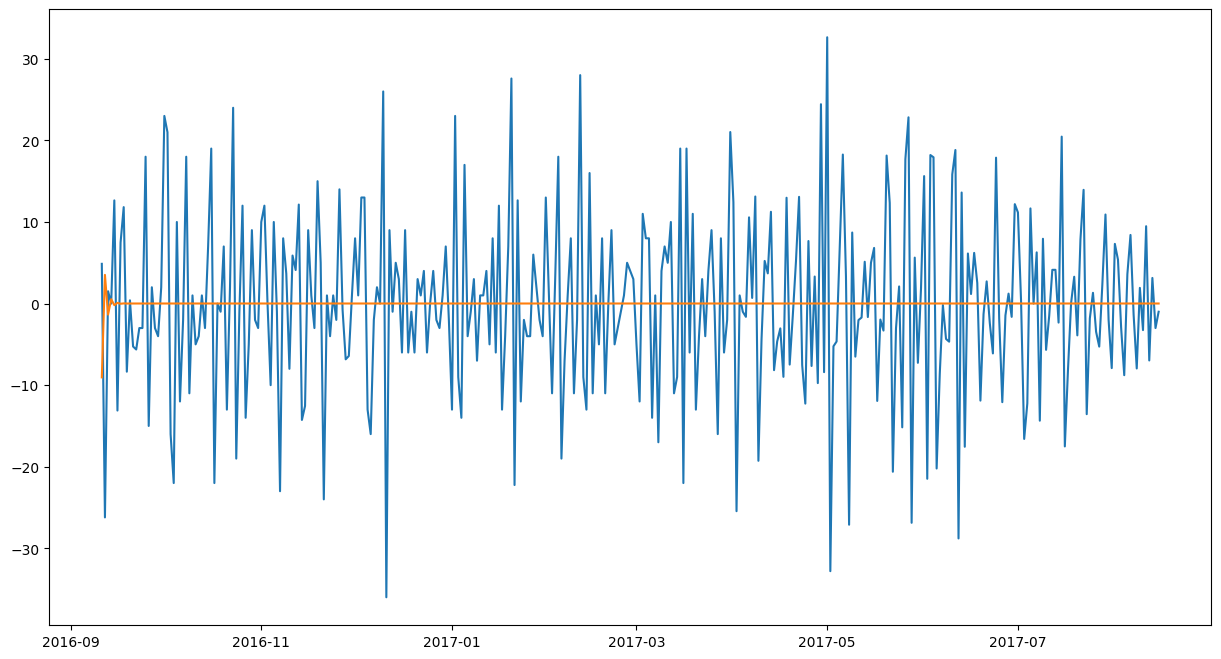

In [581]:
plt.plot(test["sales_diff1"], label ="Test set")
plt.plot(forecast_AR, label ="Forecast sales")
plt.show()

Observations from Statistical models (Sarima vs Auto Regression)
- We can see that Sarima is performing much better than auto regression here
- The error margin of the predictions in Auto Regression is performing much worse than Sarima

### Machine Learning Models

In [675]:
df_main

store_nbr                      family  sales  onpromotion  \
date                                                                    
2013-01-01          1                  AUTOMOTIVE    0.0          0.0   
2013-01-01          1                   BABY CARE    0.0          0.0   
2013-01-01          1                      BEAUTY    0.0          0.0   
2013-01-01          1                   BEVERAGES    0.0          0.0   
2013-01-01          1                       BOOKS    0.0          0.0   
...               ...                         ...    ...          ...   
2016-12-25          9                     POULTRY    0.0          0.0   
2016-12-25          9              PREPARED FOODS    0.0          0.0   
2016-12-25          9                     PRODUCE    0.0          0.0   
2016-12-25          9  SCHOOL AND OFFICE SUPPLIES    0.0          0.0   
2016-12-25          9                     SEAFOOD    0.0          0.0   

           month_name  month  year  day  sales_diff1  
date                                                  
2013-01-01    January      1  2013    1          NaN  
2013-01-01    January      1  2013    1          0.0  
2013-01-01    January      1  2013    1          0.0  
2013-01-01    January      1  2013    1          0.0  
2013-01-01    January      1  2013    1          0.0  
...               ...    ...   ...  ...          ...  
2016-12-25   December     12  2016    6          0.0  
2016-12-25   December     12  2016    6          0.0  
2016-12-25   December     12  2016    6          0.0  
2016-12-25   December     12  2016    6          0.0  
2016-12-25   December     12  2016    6          0.0  

[3008016 rows x 9 columns]

In [676]:
##grouping by day and getting sum of the total daily sales
## resetting index to have the option of selecting the aggregated column name("sales_diff1") for further analysis
df_new = df_main.drop(columns=["sales", "month_name"]).groupby([df_main.index, "store_nbr","family","onpromotion", "month", "year", "day"])["sales_diff1"].sum().reset_index()
df_new.set_index("date", inplace=True)
df_new

store_nbr                      family  onpromotion  month  year  \
date                                                                          
2013-01-01          1                  AUTOMOTIVE          0.0      1  2013   
2013-01-01          1                   BABY CARE          0.0      1  2013   
2013-01-01          1                      BEAUTY          0.0      1  2013   
2013-01-01          1                   BEVERAGES          0.0      1  2013   
2013-01-01          1                       BOOKS          0.0      1  2013   
...               ...                         ...          ...    ...   ...   
2017-08-15         54                     POULTRY          0.0      8  2017   
2017-08-15         54              PREPARED FOODS          0.0      8  2017   
2017-08-15         54                     PRODUCE         76.0      8  2017   
2017-08-15         54  SCHOOL AND OFFICE SUPPLIES          0.0      8  2017   
2017-08-15         54                     SEAFOOD          0.0      8  2017   

            day  sales_diff1  
date                          
2013-01-01    1        0.000  
2013-01-01    1        0.000  
2013-01-01    1        0.000  
2013-01-01    1        0.000  
2013-01-01    1        0.000  
...         ...          ...  
2017-08-15    1       57.619  
2017-08-15    1       34.381  
2017-08-15    1      821.371  
2017-08-15    1     -915.371  
2017-08-15    1        3.000  

[3008016 rows x 7 columns]

In [677]:
## Dividing our dataset into features and target 
##drop month_name because its redundant information, sales_diff because its our target
## we will use our differenced sales column as our target to enhance perfomance
X = df_new.drop(columns=["sales_diff1"])
y = df_new["sales_diff1"]

In [678]:
# Align X and y
X = X.loc["2013-01-01":"2017-08-15"]
y = y.loc["2013-01-01":"2017-08-15"]

# manual Split into training and testing sets to keep order
X_train, X_test = X.loc["2013-01-01":"2016-09-11"], X.loc["2016-09-12":"2017-08-15"]
y_train, y_test = y.loc["2013-01-01":"2016-09-11"], y.loc["2016-09-12":"2017-08-15"]

# Check sizes
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(2405700, 6) (2405700,) (602316, 6) (602316,)


In [679]:
## checking the datatypes of the columns to know which columns need encoding
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3008016 entries, 2013-01-01 to 2017-08-15
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   store_nbr    int64  
 1   family       object 
 2   onpromotion  float64
 3   month        int32  
 4   year         int32  
 5   day          int32  
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 126.2+ MB


In [680]:
## Creating numeric columns and categorical columns
numeric_cols = ["store_nbr","onpromotion", "month", "year", "day"]
cat_cols = ["family"]

In [681]:
## creating pipeline for Preprocessing of categorical and numeric columns 
numerical_pipeline = Pipeline(steps=[ 
    ("num_imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ("num_pipeline", numerical_pipeline, numeric_cols),
    ("cat_pipeline",categorical_pipeline, cat_cols)
])

Optimization using randomsearchcv 

In [507]:
# Define hyperparameter distributions for each model
param_dists = {
    "Linear Regression": {
        'fit_intercept': [True, False]
    },
    "XGBoost": {
        'n_estimators': randint(100, 200),
        'max_depth': randint(3, 5),
        'learning_rate': uniform(0.01, 0.1)
    }
}

# Perform encoding before fitting into the randomizedsearch model
X_encoded = preprocessor.fit_transform(X_train)

# Perform RandomizedSearchCV for each model
for model_name, model in models:
    param_dist = param_dists[model_name]
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=3, n_iter=5, n_jobs=-1)
    randomized_search.fit(X_encoded, y_train)
    print(f"Best parameters for {model_name}: {randomized_search.best_params_}")


Best parameters for Linear Regression: {'fit_intercept': True}
Best parameters for XGBoost: {'learning_rate': 0.039526701513381085, 'max_depth': 4, 'n_estimators': 140}


In [682]:
## creating pipeline for Preprocessing of categorical and numeric columns 
numerical_pipeline = Pipeline(steps=[ 
    ("num_imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ("num_pipeline", numerical_pipeline, numeric_cols),
    ("cat_pipeline",categorical_pipeline, cat_cols)
])

In [683]:
models = [
    ("Linear Regression", LinearRegression(fit_intercept = True)),
    ("XGBoost", XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate= 0.039526701513381085, max_depth=4, n_estimators=140))
]

In [684]:
all_pipeline = {}
predictions={}
metric_table = pd.DataFrame(columns=["mae", "rmse"])

for model_name, regressor in models:

    final_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("Regressor", regressor)  # Use the regressor from the models list
    ])

    # Fit data to pipeline
    final_pipeline.fit(X_train, y_train)


    # Add pipeline to dictionary
    all_pipeline[model_name] = final_pipeline
    
       # Save the model using joblib
    models_folder = 'models'
    os.makedirs(models_folder, exist_ok=True)
    model_file_path = os.path.join(models_folder, f'{model_name.lower().replace(" ", "_")}_model.joblib')
    dump(final_pipeline, model_file_path)
    
    # Predict on evaluation set
    y_pred = final_pipeline.predict(X_test)

    # Store predictions
    predictions[model_name] = y_pred

    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{model_name} model is trained")

    # Add metrics to the metrics table
    metric_table.loc[model_name] = [mae, rmse]

metric_table.sort_values(by="rmse")  # Sort by RMSE, or choose the metric you want


Linear Regression model is trained
XGBoost model is trained


mae         rmse
XGBoost            395.934503  1033.339467
Linear Regression  467.417461  1276.846286

In [523]:
predictions

{'Linear Regression': array([  -60.13778843,   -49.09454743,   -41.10004562, ...,
         2116.38008904, -1168.00670528,   -57.51251853]),
 'XGBoost': array([  -36.368107,   -36.368107,   -36.368107, ...,  2169.8809  ,
        -1511.6603  ,   -36.368107], dtype=float32)}

Plotting the predictions against the actual test sale values of XGBoost and Linear Regression

In [524]:
y_pred_lr = predictions["Linear Regression"] 
y_pred_xgb = predictions["XGBoost"] 

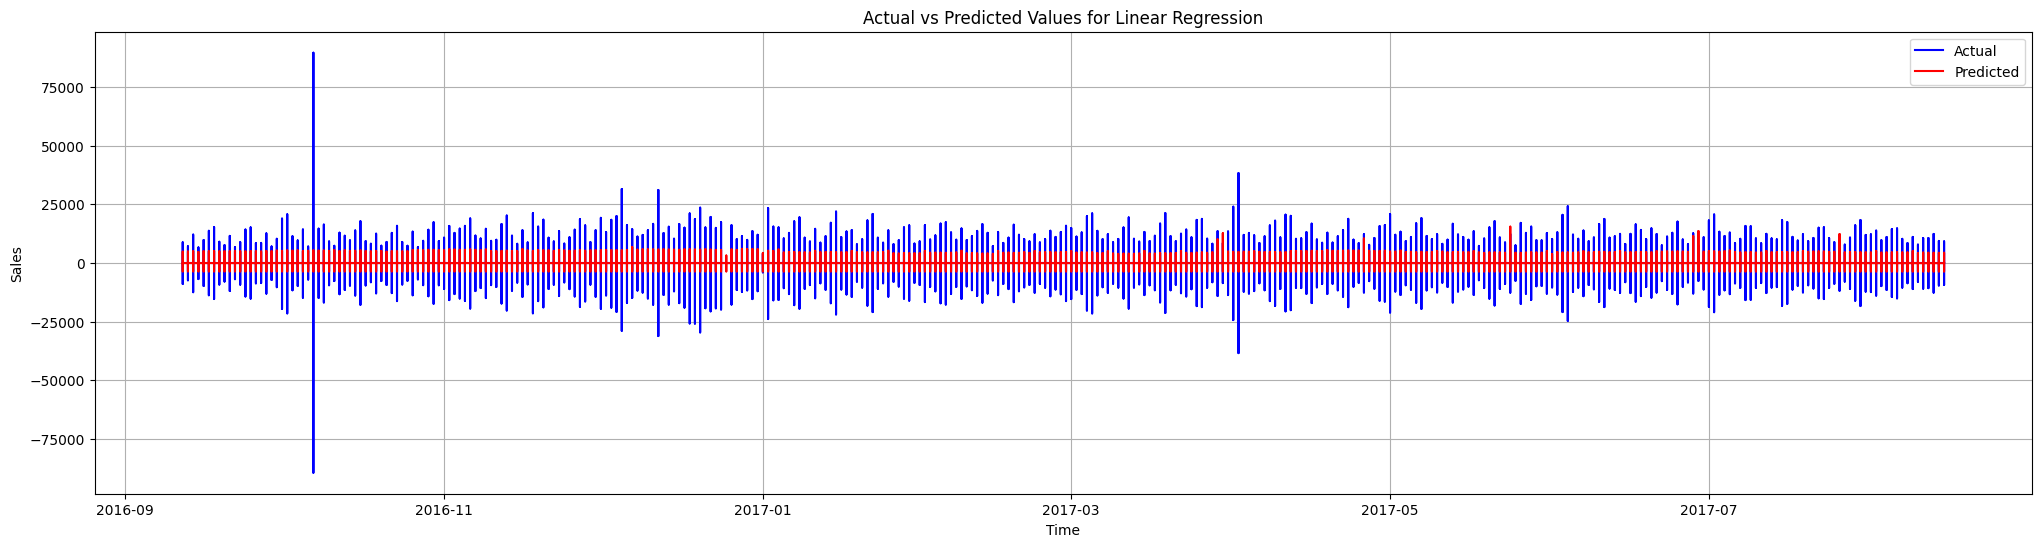

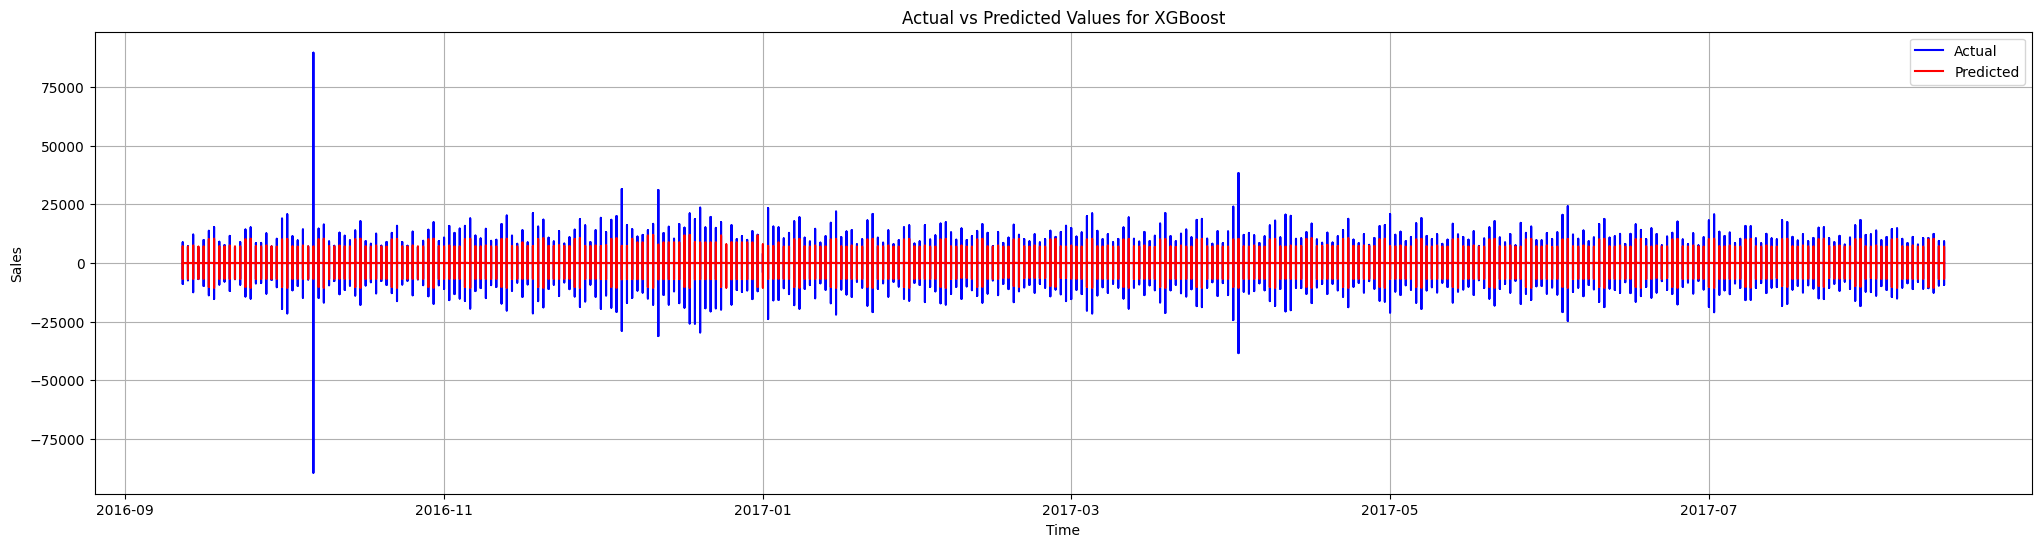

In [533]:
# Plot for Linear Regression
plt.figure(figsize=(25, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Plot for XGBoost
plt.figure(figsize=(25, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Values for XGBoost')
plt.legend()
plt.grid(True)
plt.show()


Observation
- We can see that after optimization, XGBoost seems to be performing better than Linear Regression model.
- But by comparing the stats models and then traditional ML models we can see that SARIMA yields the best results with a very low mae and rmse as compared to XGBoost, LinearRegression and Auto Regression models

In [545]:
##dropping family because encoding it will make our model too complex and hard to train

df_lstm = df_main.drop(columns=["family","month_name", "sales"])

In [556]:
# Backfill along rows (axis=0)
df_lstm_filled = df_lstm.fillna(method='bfill', axis=0)
df_lstm_filled.head()

store_nbr  onpromotion  month  year  day  sales_diff1
date                                                             
2013-01-01          1          0.0      1  2013    1          0.0
2013-01-01          1          0.0      1  2013    1          0.0
2013-01-01          1          0.0      1  2013    1          0.0
2013-01-01          1          0.0      1  2013    1          0.0
2013-01-01          1          0.0      1  2013    1          0.0

In [559]:
data = df_lstm_filled
data

store_nbr  onpromotion  month  year  day  sales_diff1
date                                                             
2013-01-01          1          0.0      1  2013    1          0.0
2013-01-01          1          0.0      1  2013    1          0.0
2013-01-01          1          0.0      1  2013    1          0.0
2013-01-01          1          0.0      1  2013    1          0.0
2013-01-01          1          0.0      1  2013    1          0.0
...               ...          ...    ...   ...  ...          ...
2016-12-25          9          0.0     12  2016    6          0.0
2016-12-25          9          0.0     12  2016    6          0.0
2016-12-25          9          0.0     12  2016    6          0.0
2016-12-25          9          0.0     12  2016    6          0.0
2016-12-25          9          0.0     12  2016    6          0.0

[3008016 rows x 6 columns]

Exploring Recurrent Networks for Time Series Data (LSTM)

In [560]:
# Set the cutoff date
cutoff_date = "2016-09-11"

# Split the data into train and test sets
train_data = data[data.index < cutoff_date]
test_data = data[data.index >= cutoff_date]

# Separate features and target variable for train and test sets
X_train, y_train = train_data.drop(columns=['sales_diff1']), train_data['sales_diff1']
X_test, y_test = test_data.drop(columns=['sales_diff1']), test_data['sales_diff1']

In [585]:

## defining a function for rmse to be used for evaluation of our LSTM
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))



# Scale the data using min-max scaler as it is appropriate for LSTM
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))  ##reshaped into (no of samples, timesteps, no of features)
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss=rmse)

# Fit the model
model.fit(X_train_reshaped, y_train, epochs=7, batch_size=32, verbose=1)   ## epochs indicates number of times the model iterates over the entire dataset
                                                                            ##batch_size: amount of dataset to process before updating the internal model parameters 

# Make predictions
y_pred_train = model.predict(X_train_reshaped)
y_pred_test = model.predict(X_test_reshaped)

Epoch 1/7


75123/75123 ━━━━━━━━━━━━━━━━━━━━ 286s 3ms/step - loss: 1305.2839
Epoch 2/7
75123/75123 ━━━━━━━━━━━━━━━━━━━━ 217s 3ms/step - loss: 1256.4822
Epoch 3/7
75123/75123 ━━━━━━━━━━━━━━━━━━━━ 214s 3ms/step - loss: 1243.1024
Epoch 4/7
75123/75123 ━━━━━━━━━━━━━━━━━━━━ 214s 3ms/step - loss: 1242.3914
Epoch 5/7
75123/75123 ━━━━━━━━━━━━━━━━━━━━ 212s 3ms/step - loss: 1240.2148
Epoch 6/7
75123/75123 ━━━━━━━━━━━━━━━━━━━━ 211s 3ms/step - loss: 1237.9993
Epoch 7/7
75123/75123 ━━━━━━━━━━━━━━━━━━━━ 214s 3ms/step - loss: 1234.1414
75123/75123 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step
18879/18879 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step


In [674]:
## Saving the LSTM model
models_folder = 'models'
os.makedirs(models_folder, exist_ok=True)
model_file_path = os.path.join(models_folder, 'lstm_model.joblib')
dump(model, model_file_path)

['models\\lstm_model.joblib']

In [584]:
##crosschecking the shape of our input data
X_train_scaled.shape

(2403918, 5)

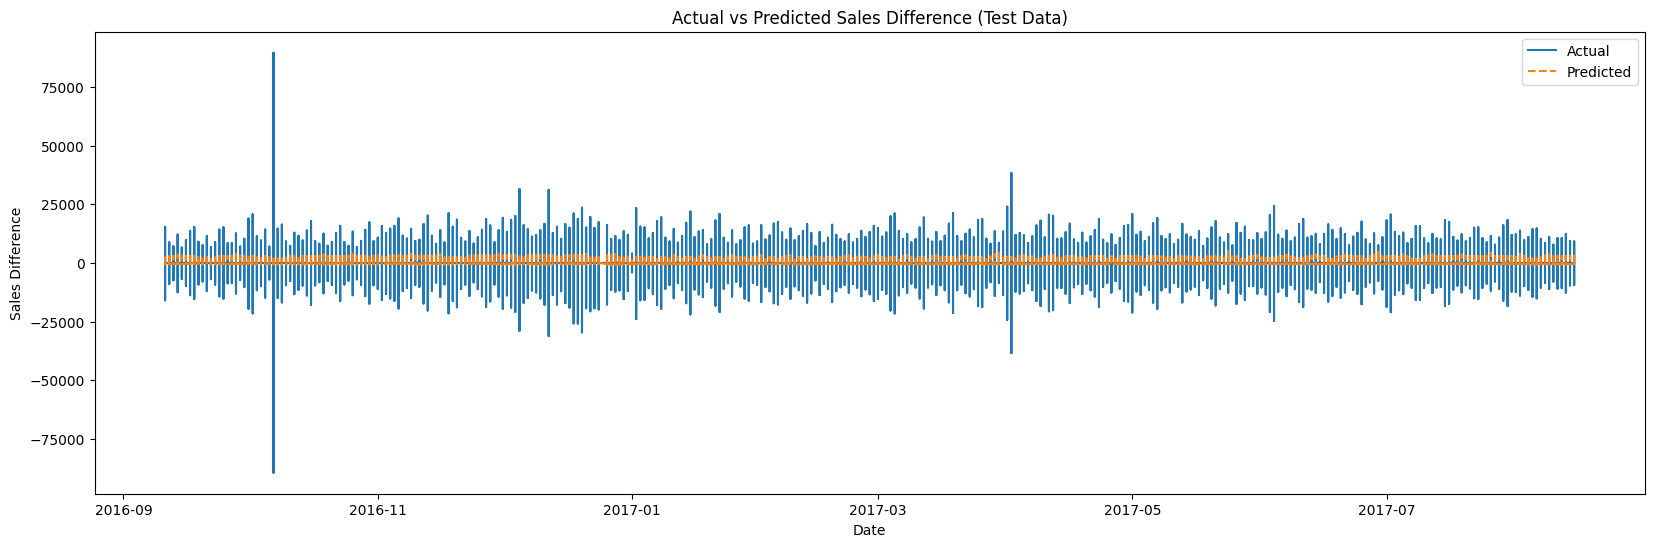

In [587]:
# Align predictions with test data
y_pred_test_aligned = np.empty_like(y_test)
y_pred_test_aligned[:] = np.nan
y_pred_test_aligned[:len(y_pred_test)] = y_pred_test.reshape(-1)

# Plot actual vs predicted for test data
plt.figure(figsize=(20, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_test_aligned, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales Difference')
plt.title('Actual vs Predicted Sales Difference (Test Data)')
plt.legend()
plt.show()


Stat models vs ML models vs RNN Comparison

|models | rmse | mae|
|----------|----------|-----|
| SARIMA | 10.14 | 7.60
| Auto Regression| 11.048| 8.44|
| XGBoost | 1033.34 | 395.93|
| Linear Regression | 1276.85 | 467.41|
| LSTM  | 1234.2782

SARIMA: This model has the lowest RMSE among the ones listed, indicating that it might be the best-performing model for the task.

Auto Regression: Though auto regression has a descent rmse, after visualizing the predictions against the actual test values, it actuualy performed the worst.

XGBoost: The RMSE for XGBoost is significantly higher than SARIMA and Auto Regression, indicating that it may not be well-suited for this particular task or requires further tuning.

Linear Regression: The RMSE for Linear Regression is also quite high, suggesting that it might not be the best choice for this task compared to the other models.

LSTM: The RMSE for LSTM falls between Linear and XGBoost, indicating that it performs better than Linear but not as well as XGBoost. 

Key Challenges to note
- GridsearchCV couldn't obtain the optimal hyperparameters required due to less computational power
- LSTM had only one hidden layer due to less computational power as well. With more computational power, LSTM could perform much better by increasing epoch size and reducing the batch size.
